<a href="https://colab.research.google.com/github/Aaketk17/DataMining/blob/main/20221762_2237629_Athavan_DM_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librarie**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from math import sqrt

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from statistics import mean


import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Connect the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# **Data Preparartion**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Python Works/MSc Data Mining/fundamentals.csv')
df.head()

Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0           0           AAL    2012-12-31      3.068000e+09   
1           1           AAL    2013-12-31      4.975000e+09   
2           2           AAL    2014-12-31      4.668000e+09   
3           3           AAL    2015-12-31      5.102000e+09   
4           4           AAP    2012-12-29      2.409453e+09   

   Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0         -222000000.0               -1.961000e+09           23.0   
1          -93000000.0               -2.723000e+09           67.0   
2         -160000000.0               -1.500000e+08          143.0   
3          352000000.0               -7.080000e+08          135.0   
4          -89482000.0                6.000000e+05           32.0   

   Capital Expenditures  Capital Surplus  Cash Ratio  \
0         -1.888000e+09     4.695000e+09        53.0   
1         -3.114000e+09     1.059200e+10        75.0   
2         -5.311000e+09     1.513500e+10        60.0   
3         -6.151000e+09     1.159100e+10        51.0   
4         -2.711820e+08     5.202150e+08        23.0   

   Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
0               1.330000e+09                     0.0    127000000.0   
1               2.175000e+09                     0.0      5000000.0   
2               1.768000e+09                     0.0      7000000.0   
3               1.085000e+09                     0.0      6000000.0   
4               5.981110e+08            -260298000.0         7000.0   

   Cost of Revenue  Current Ratio  Deferred Asset Charges  \
0     1.049900e+10           78.0            0.000000e+00   
1     1.101900e+10          104.0            0.000000e+00   
2     1.562000e+10           88.0            0.000000e+00   
3     1.109600e+10           73.0            2.477000e+09   
4     3.106967e+09          124.0            0.000000e+00   

   Deferred Liability Charges  Depreciation  Earnings Before Interest and Tax  \
0                 223000000.0  1.001000e+09                     -1.813000e+09   
1                 935000000.0  1.020000e+09                     -1.324000e+09   
2                 829000000.0  1.342000e+09                      4.099000e+09   
3                 667000000.0  1.487000e+09                      5.496000e+09   
4                         0.0  1.895440e+08                      6.579150e+08   

   Earnings Before Tax  Effect of Exchange Rate  \
0        -2.445000e+09                      0.0   
1        -2.180000e+09                      0.0   
2         3.212000e+09                      0.0   
3         4.616000e+09                      0.0   
4         6.240740e+08                      0.0   

   Equity Earnings/Loss Unconsolidated Subsidiary  Fixed Assets      Goodwill  \
0                                             0.0  1.340200e+10  0.000000e+00   
1                                             0.0  1.925900e+10  4.086000e+09   
2                                             0.0  2.308400e+10  4.091000e+09   
3                                             0.0  2.751000e+10  4.091000e+09   
4                                             0.0  1.292547e+09  7.638900e+07   

   Gross Margin  Gross Profit    Income Tax  Intangible Assets  \
0          58.0  1.435600e+10 -5.690000e+08       8.690000e+08   
1          59.0  1.572400e+10 -3.460000e+08       2.311000e+09   
2          63.0  2.703000e+10  3.300000e+08       2.240000e+09   
3          73.0  2.989400e+10 -2.994000e+09       2.249000e+09   
4          50.0  3.098036e+09  2.364040e+08       2.884500e+07   

   Interest Expense     Inventory   Investments   Liabilities  Long-Term Debt  \
0       632000000.0  5.800000e+08  3.060000e+08  4.730000e+08    7.116000e+09   
1       856000000.0  1.012000e+09 -1.181000e+09 -2.350000e+08    1.535300e+10   
2       887000000.0  1.004000e+09  1.799000e+09 -1.026000e+09    1.604300e+10   
3       880000000.0  8.630000e+08  4.430000e+08 -6.330000e+08    1.833000e+1

In [ ]:
df.describe()

Unnamed: 0  Accounts Payable  Accounts Receivable  \
count  1781.000000      1.781000e+03         1.781000e+03   
mean    890.000000      4.673418e+09        -6.353484e+07   
std     514.274732      1.406047e+10         7.562794e+08   
min       0.000000      0.000000e+00        -6.452000e+09   
25%     445.000000      5.160000e+08        -1.040000e+08   
50%     890.000000      1.334000e+09        -1.830000e+07   
75%    1335.000000      3.246000e+09         7.816000e+06   
max    1780.000000      2.069390e+11         2.266400e+10   

       Add'l income/expense items  After Tax ROE  Capital Expenditures  \
count                1.781000e+03    1781.000000          1.781000e+03   
mean                 6.908940e+07      43.601348         -1.251925e+09   
std                  6.848143e+08     233.924028          2.979963e+09   
min                 -6.768000e+09       0.000000         -3.798500e+10   
25%                 -2.638000e+06      10.000000         -1.151200e+09   
50%                  2.000000e+06      16.000000         -3.580000e+08   
75%                  3.359200e+07      26.000000         -1.291000e+08   
max                  1.416200e+10    5789.000000          5.000000e+06   

       Capital Surplus   Cash Ratio  Cash and Cash Equivalents  \
count     1.781000e+03  1482.000000               1.781000e+03   
mean      5.351784e+09    74.457490               8.521399e+09   
std       1.133977e+10   102.298374               5.432105e+10   
min      -7.215000e+08     0.000000               2.100000e+04   
25%       4.791000e+08    17.000000               3.088000e+08   
50%       1.997080e+09    41.000000               8.625900e+08   
75%       5.735000e+09    90.000000               2.310000e+09   
max       1.082880e+11  1041.000000               7.281110e+11   

       Changes in Inventories  Common Stocks  Cost of Revenue  Current Ratio  \
count            1.781000e+03   1.781000e+03     1.781000e+03    1482.000000   
mean            -6.787749e+07   1.608543e+09     1.235213e+10     186.771255   
std              3.903369e+08   9.177636e+09     3.041419e+10     128.066801   
min             -5.562000e+09   0.000000e+00     0.000000e+00      17.000000   
25%             -5.400000e+07   1.628000e+06     1.194400e+09     109.000000   
50%              0.000000e+00   7.725000e+06     3.685000e+09     152.000000   
75%              0.000000e+00   2.970000e+08     9.800600e+09     226.000000   
max              3.755000e+09   1.581420e+11     3.650860e+11    1197.000000   

       Deferred Asset Charges  Deferred Liability Charges  Depreciation  \
count            1.781000e+03                1.781000e+03  1.781000e+03   
mean             5.908020e+08                1.610769e+09  1.084239e+09   
std              2.666744e+09                4.548630e+09  2.188300e+09   
min              0.000000e+00                0.000000e+00 -4.480000e+08   
25%              0.000000e+00                0.000000e+00  1.799000e+08   
50%              0.000000e+00                2.060000e+08  4.280310e+08   
75%              1.471490e+08                1.082831e+09  1.047000e+09   
max              3.686000e+10                5.618100e+10  2.951700e+10   

       Earnings Before Interest and Tax  Earnings Before Tax  \
count                      1.781000e+03         1.781000e+03   
mean                       2.710102e+09         2.375333e+09   
std                        6.145345e+09         5.720792e+09   
min                       -2.792700e+10        -2.822600e+10   
25%                        5.851630e+08         4.900000e+08   
50%                        1.139200e+09         9.601170e+08   
75%                        2.586000e+09         2.255000e+09   
max                        7.905300e+10         7.872600e+10   

       Effect of Exchange Rate  \
count             1.781000e+03   
mean             -3.849098e+07   
std               1.626735e+08   
min              -3.067000e+09   
25%              -2.000000e+07   
50%              -

**Handling Missing Values**

In [ ]:
# Check for any missing values in entire dataset 
df.isnull().values.any()  

True

In [ ]:
# Check for columnwise non-null count and dataType
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

In [ ]:
# Check for columnwise missing count
df.isnull().sum().sort_values(ascending=False)

Quick Ratio                                            299
Cash Ratio                                             299
Current Ratio                                          299
Estimated Shares Outstanding                           219
Earnings Per Share                                     219
For Year                                               173
Treasury Stock                                           0
Other Operating Activities                               0
Other Liabilities                                        0
Other Investing Activities                               0
Other Financing Activities                               0
Other Equity                                             0
Other Current Liabilities                                0
Other Current Assets                                     0
Other Assets                                             0
Pre-Tax Margin                                           0
Operating Margin                                        

In [ ]:
# Check for rowwise missing count
df.isnull().sum(axis=1).tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 3,
 3,
 3,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 5,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,


In [ ]:
df1 = df.copy()

# Drop the first column 
df1 = df1.drop(df1.columns[0], axis=1)

# Drop variables with missing values which are derived columns
df1.drop(['Quick Ratio', 'Cash Ratio' ,'Current Ratio', 'Earnings Per Share', 'For Year'], axis=1, inplace=True)

# Check for columnwise missing count
df1.isnull().sum().sort_values(ascending=False)

Estimated Shares Outstanding                           219
Net Cash Flows-Investing                                 0
Other Operating Activities                               0
Other Liabilities                                        0
Other Investing Activities                               0
Other Financing Activities                               0
Other Equity                                             0
Other Current Liabilities                                0
Other Current Assets                                     0
Other Assets                                             0
Operating Margin                                         0
Operating Income                                         0
Non-Recurring Items                                      0
Net Receivables                                          0
Net Income-Cont. Operations                              0
Net Income Applicable to Common Shareholders             0
Net Income Adjustments                                  

In [ ]:
# Drop records with NaN ESO
df1 = df1.dropna(axis=0)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562 entries, 0 to 1779
Data columns (total 73 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ticker Symbol                                        1562 non-null   object 
 1   Period Ending                                        1562 non-null   object 
 2   Accounts Payable                                     1562 non-null   float64
 3   Accounts Receivable                                  1562 non-null   float64
 4   Add'l income/expense items                           1562 non-null   float64
 5   After Tax ROE                                        1562 non-null   float64
 6   Capital Expenditures                                 1562 non-null   float64
 7   Capital Surplus                                      1562 non-null   float64
 8   Cash and Cash Equivalents                            1562 non-null  

**Handling Outliers**

In [ ]:
# Drop categorical variables
df2 = df1.copy()

df2.drop(['Ticker Symbol', 'Period Ending'], axis=1, inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562 entries, 0 to 1779
Data columns (total 71 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Accounts Payable                                     1562 non-null   float64
 1   Accounts Receivable                                  1562 non-null   float64
 2   Add'l income/expense items                           1562 non-null   float64
 3   After Tax ROE                                        1562 non-null   float64
 4   Capital Expenditures                                 1562 non-null   float64
 5   Capital Surplus                                      1562 non-null   float64
 6   Cash and Cash Equivalents                            1562 non-null   float64
 7   Changes in Inventories                               1562 non-null   float64
 8   Common Stocks                                        1562 non-null  

In [ ]:
# # Box Plot
# fig, axes = plt.subplots(2, 3, figsize=(8,4), sharex=True, sharey=True, dpi=100)
# df2.boxplot()

'fig, axes = plt.subplots(2, 3, figsize=(8,4), sharex=True, sharey=True, dpi=100)\ndf2.boxplot()'

In [ ]:
# # Create the figure and two subplots
# fig, axes = plt.subplots(ncols=len(df2))

# # Create the boxplot with Seaborn
# for column, axis in zip(df2, axes):
#         sns.boxplot(data=df2[column], ax=axis) 
#         axis.set_title(column)
#         # axis.set(xticklabels=[], xticks=[], ylabel=column)

# # Show the plot
# plt.tight_layout()
# plt.show()

'# Create the figure and two subplots\nfig, axes = plt.subplots(ncols=len(df2))\n\n# Create the boxplot with Seaborn\nfor column, axis in zip(df2, axes):\n        sns.boxplot(data=df2[column], ax=axis) \n        axis.set_title(column)\n        # axis.set(xticklabels=[], xticks=[], ylabel=column)\n\n# Show the plot\nplt.tight_layout()\nplt.show()'

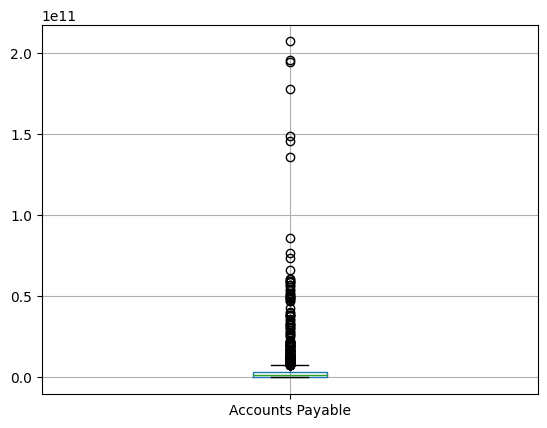

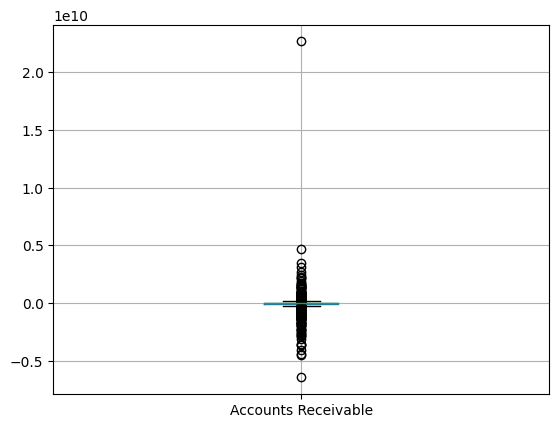

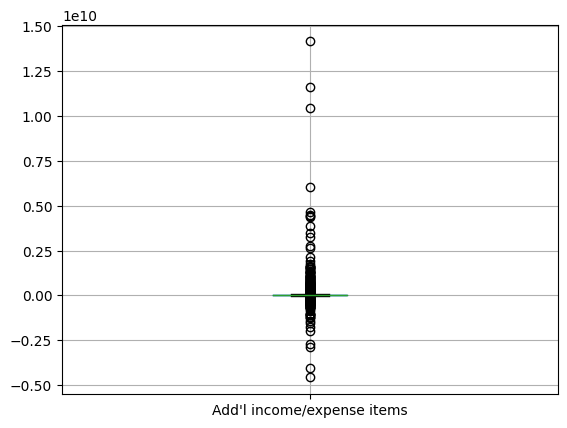

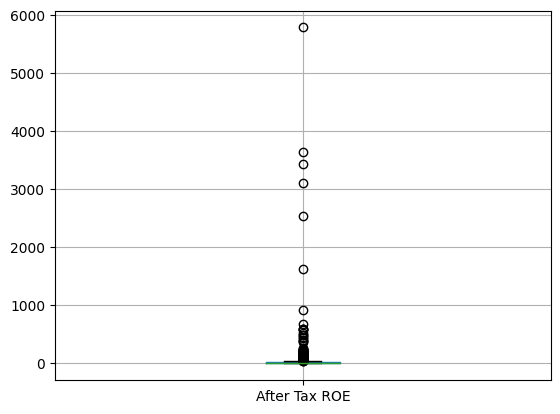

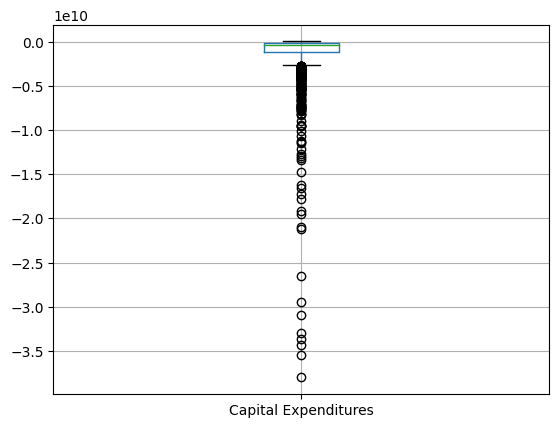

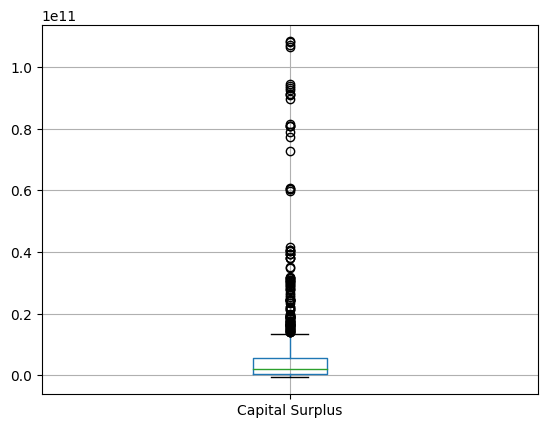

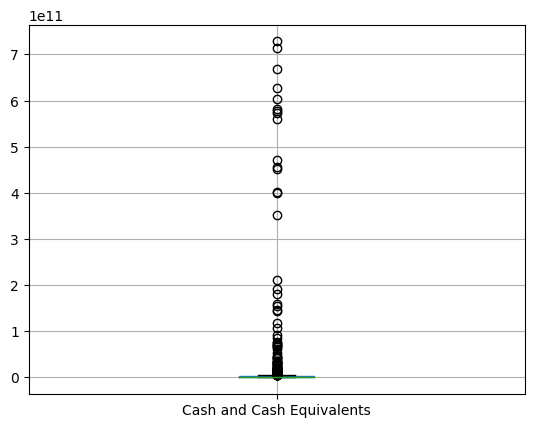

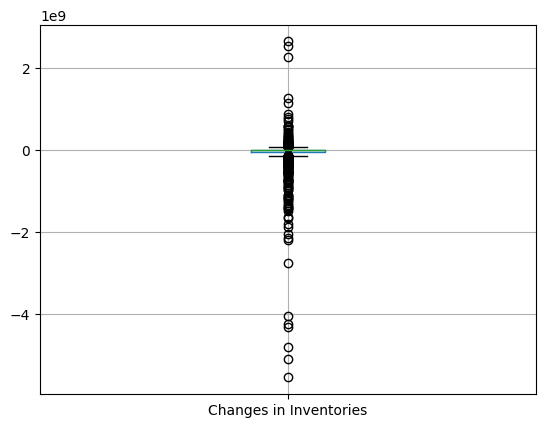

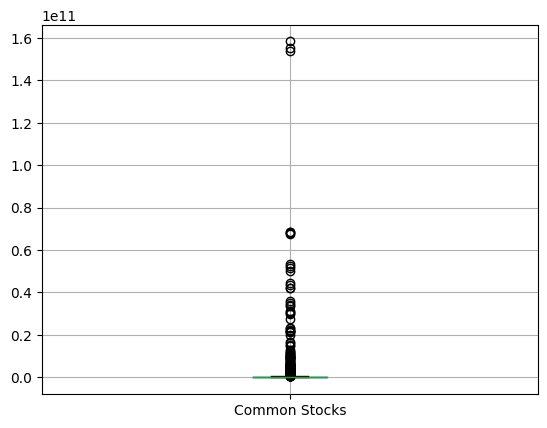

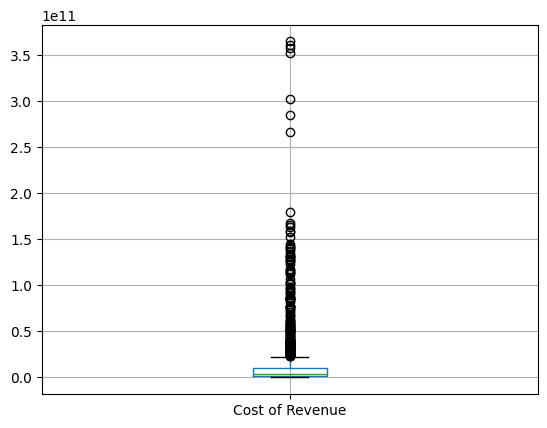

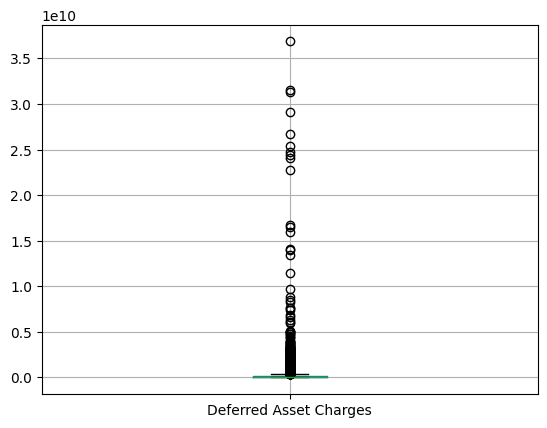

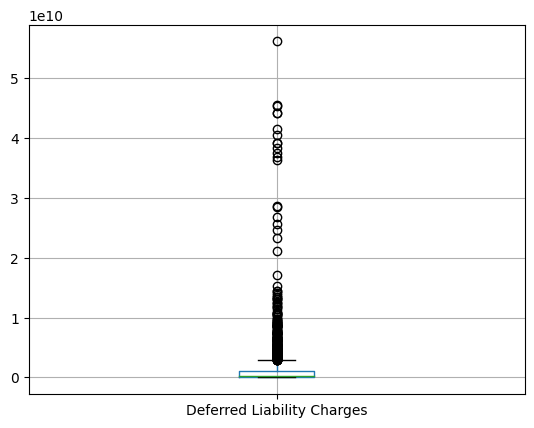

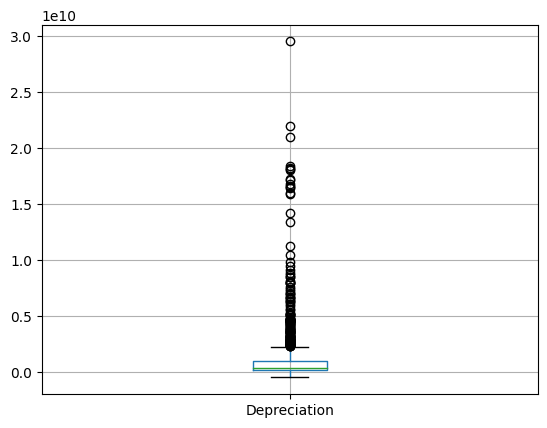

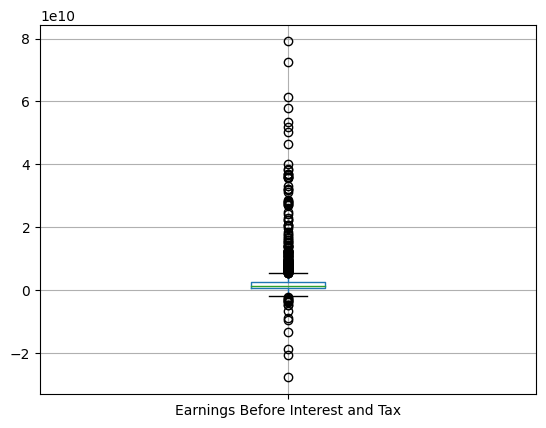

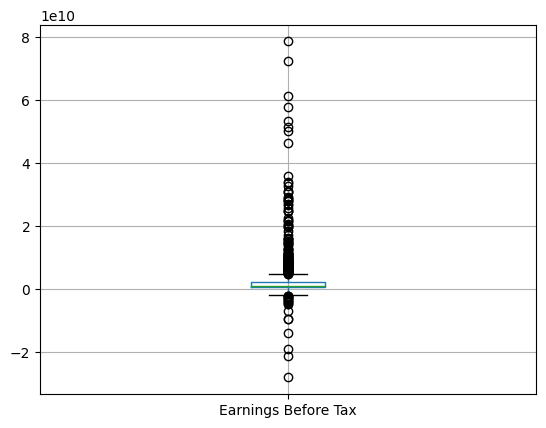

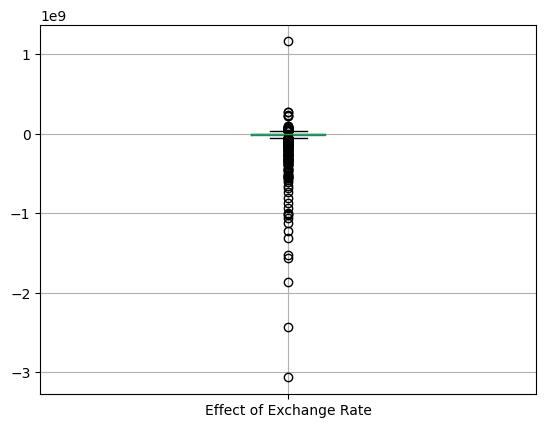

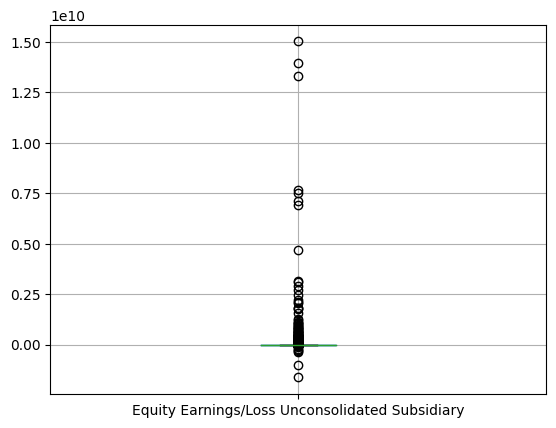

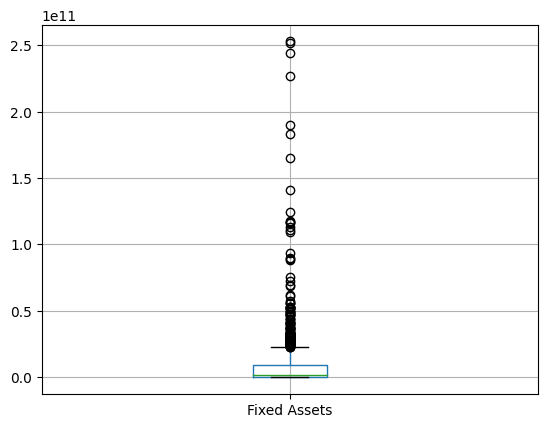

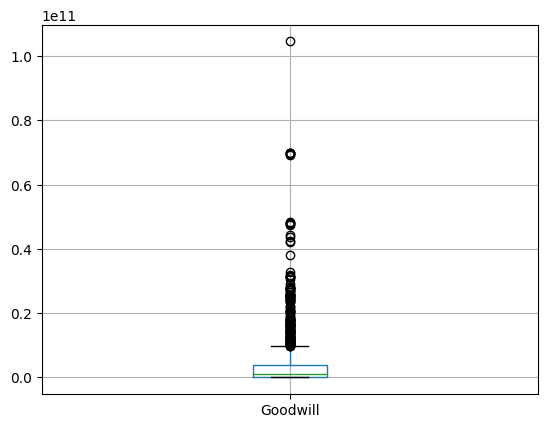

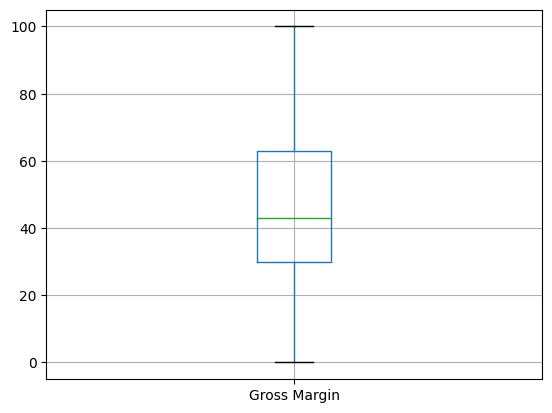

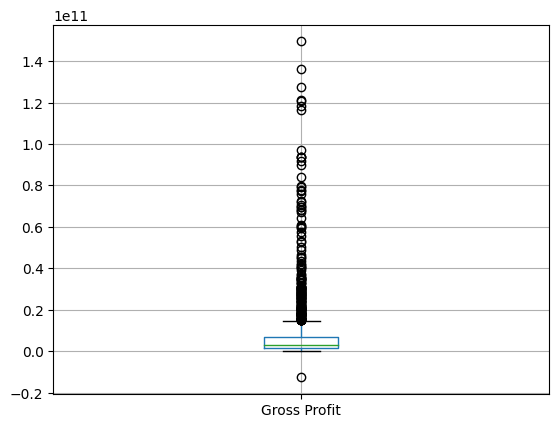

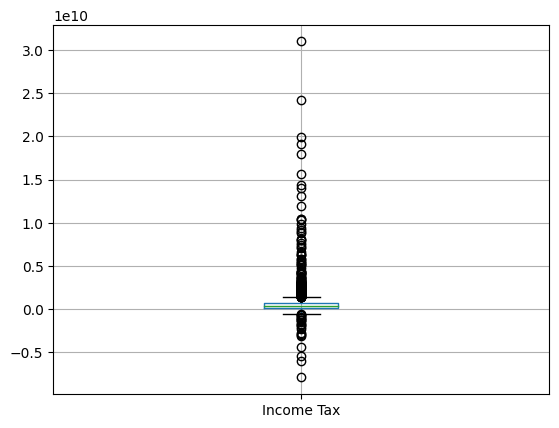

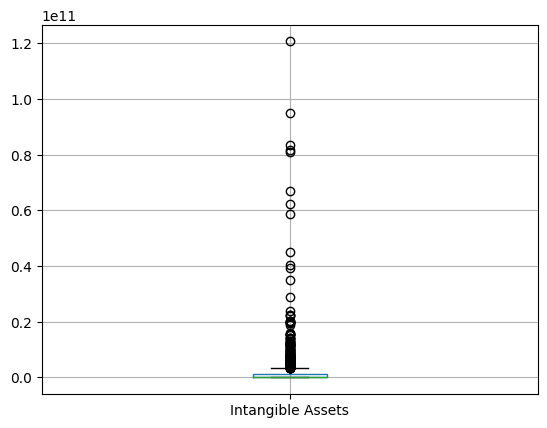

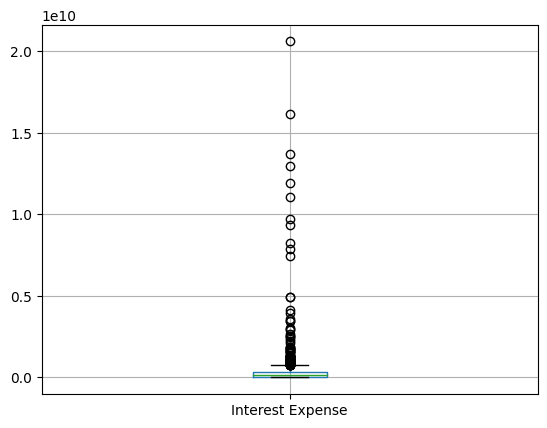

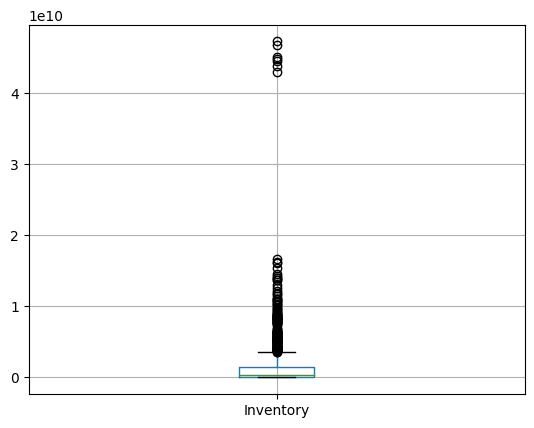

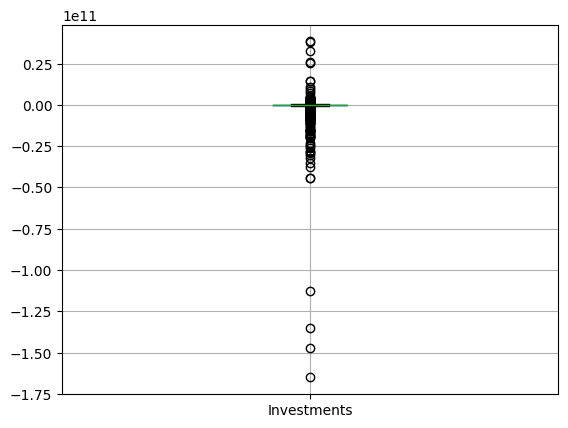

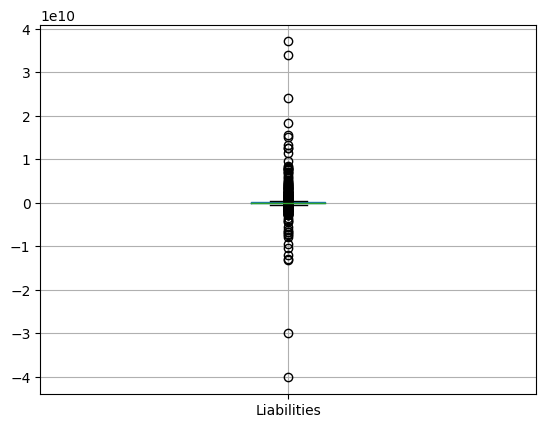

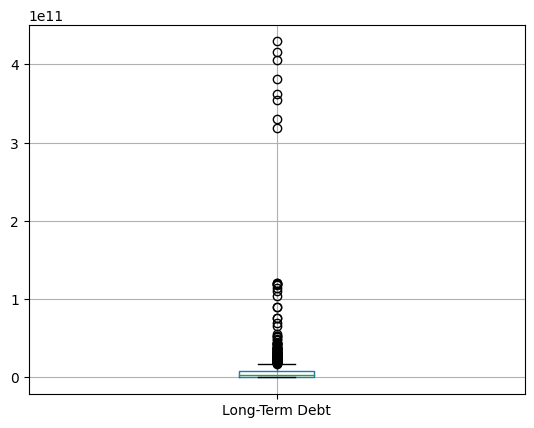

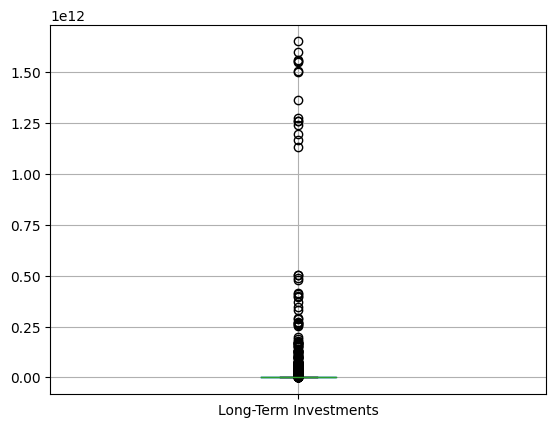

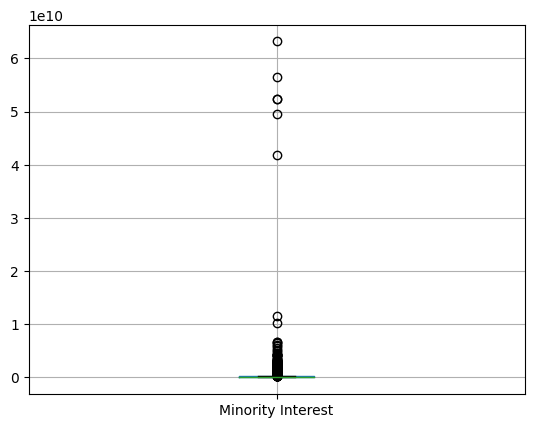

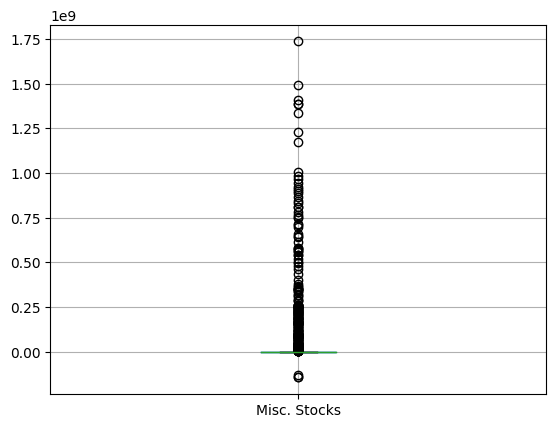

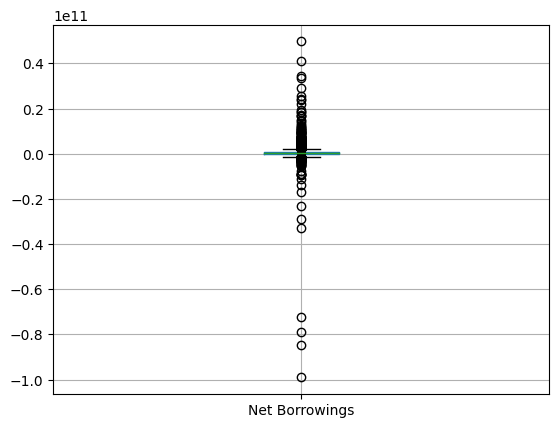

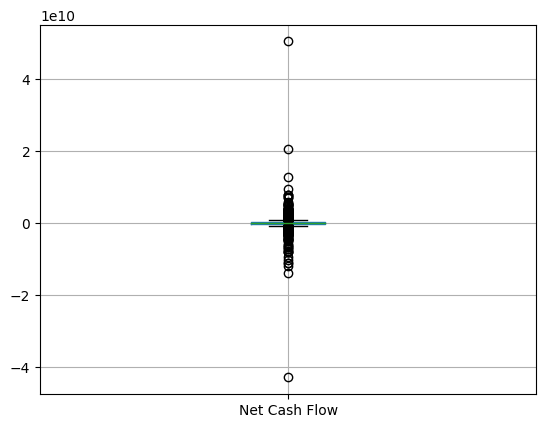

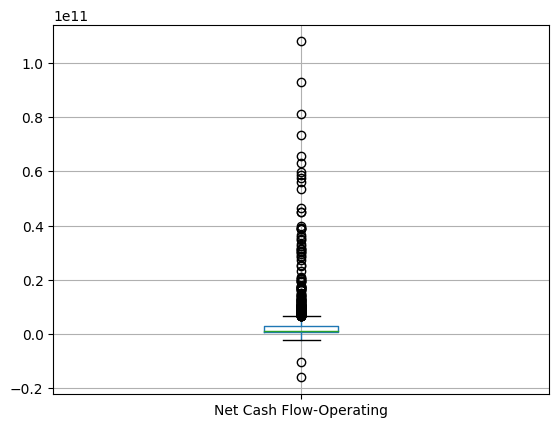

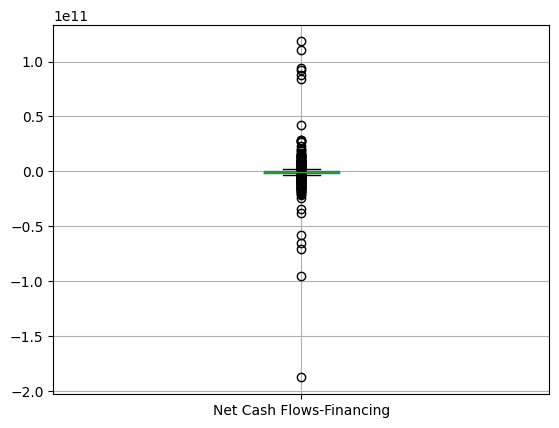

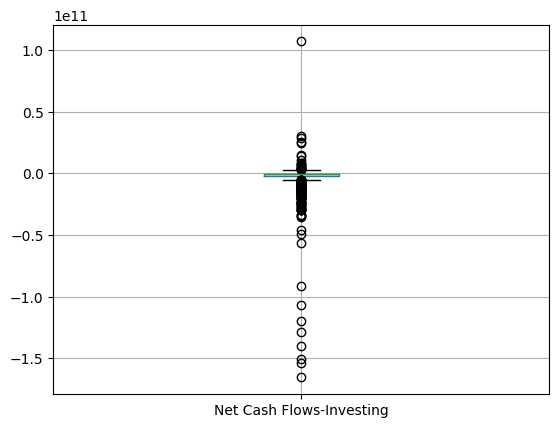

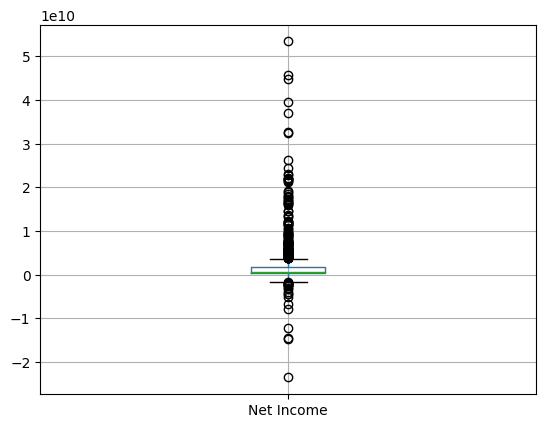

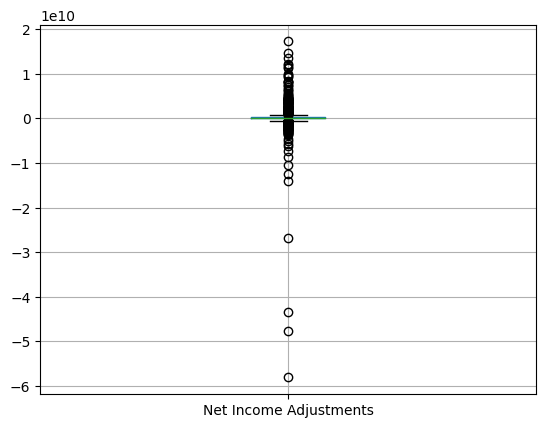

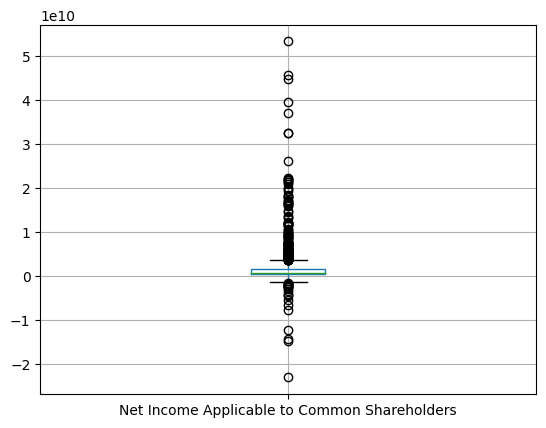

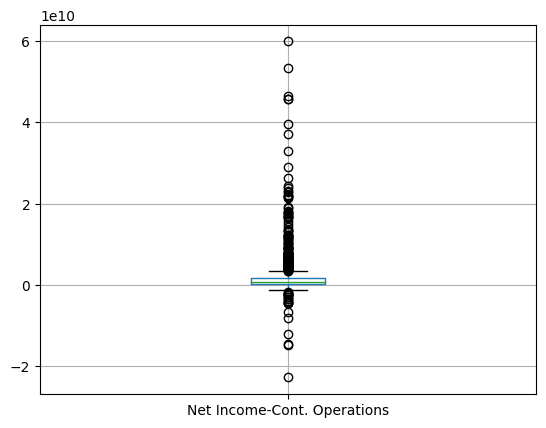

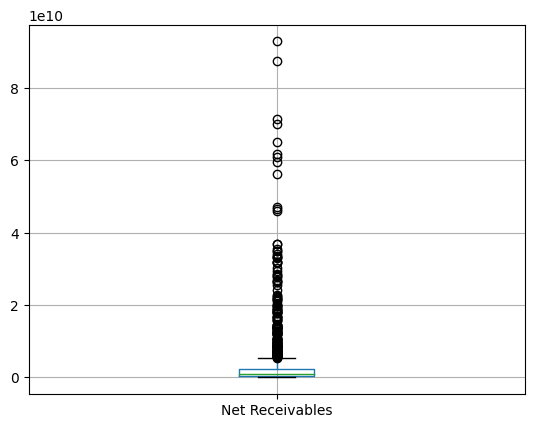

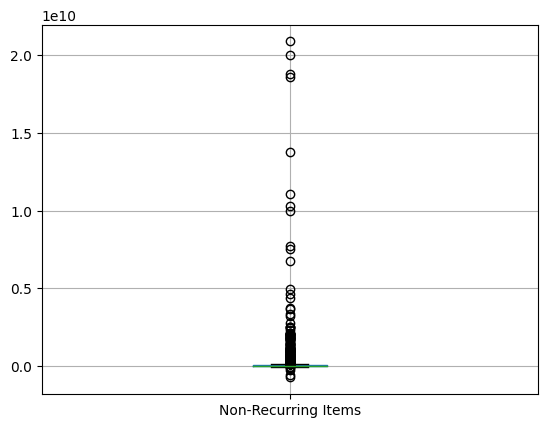

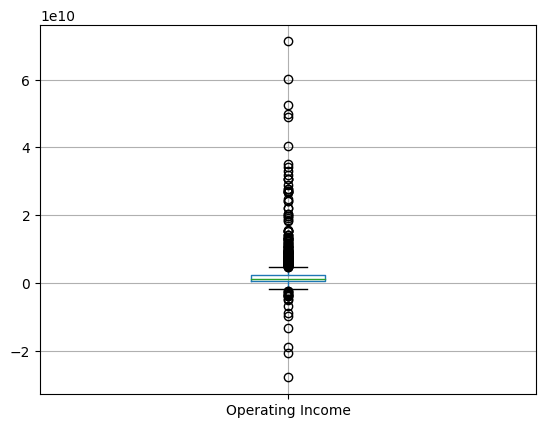

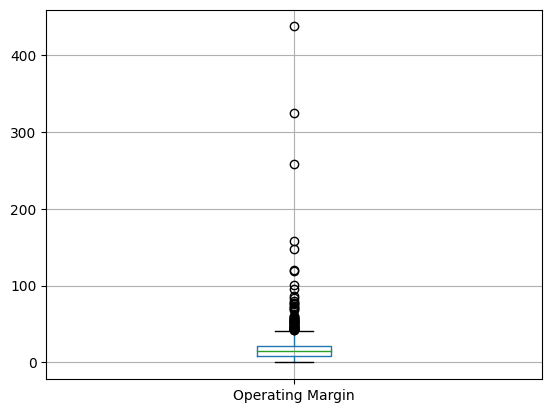

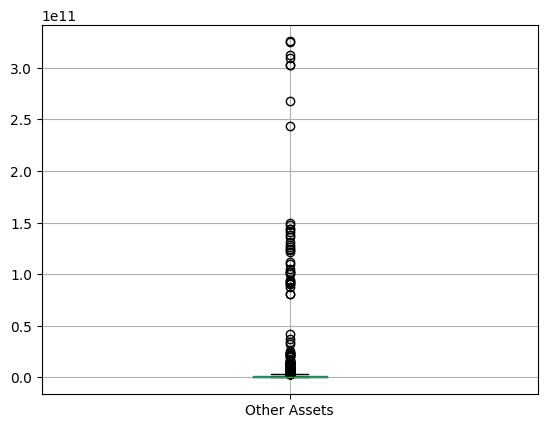

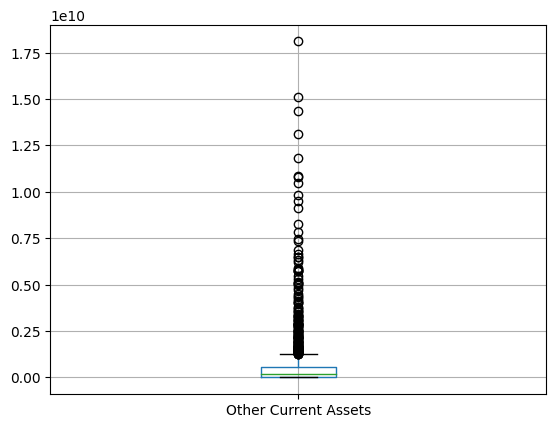

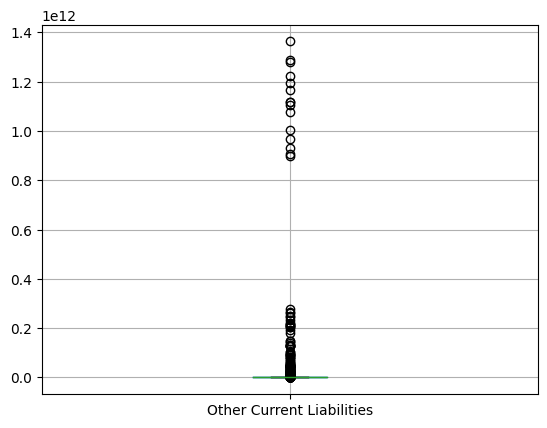

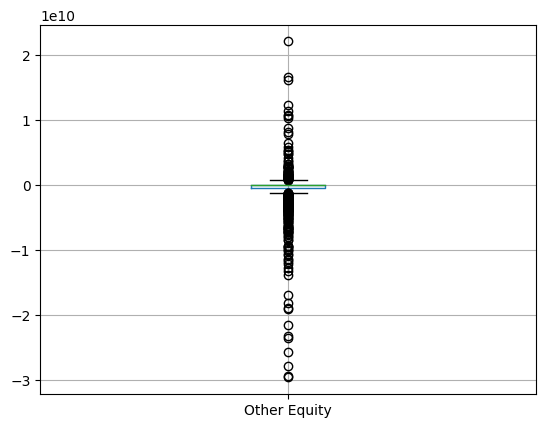

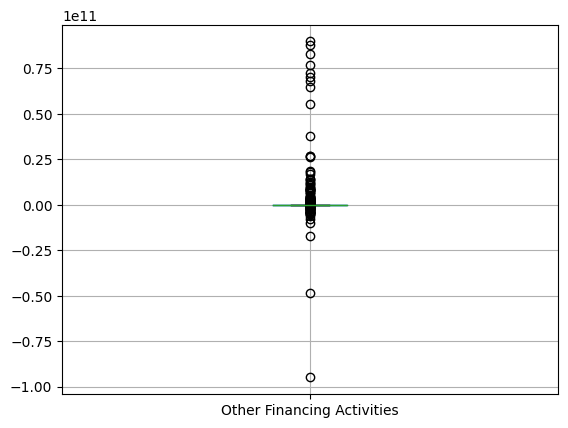

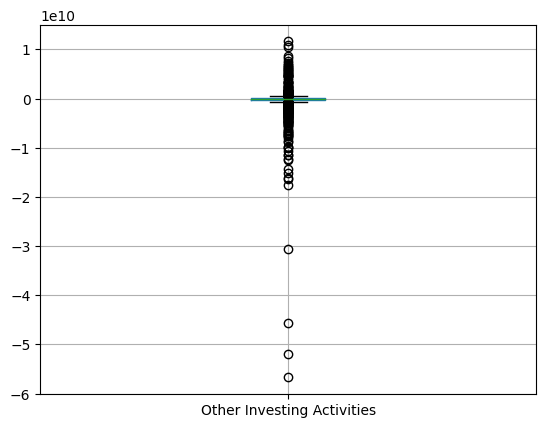

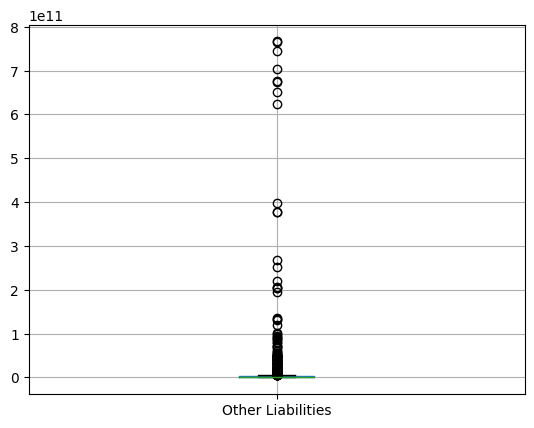

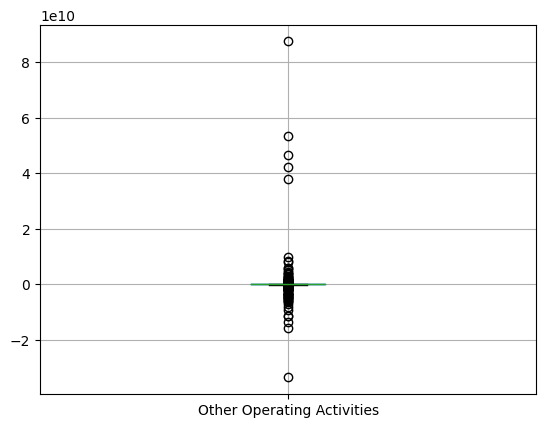

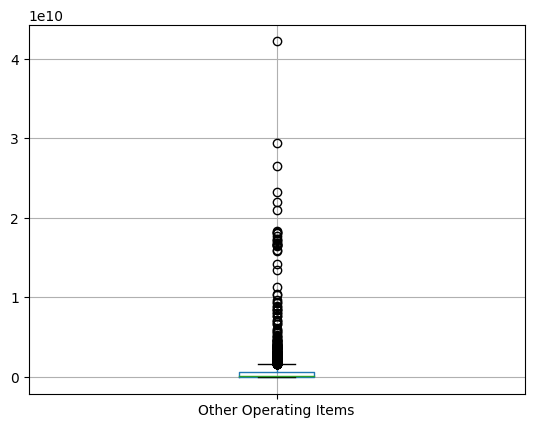

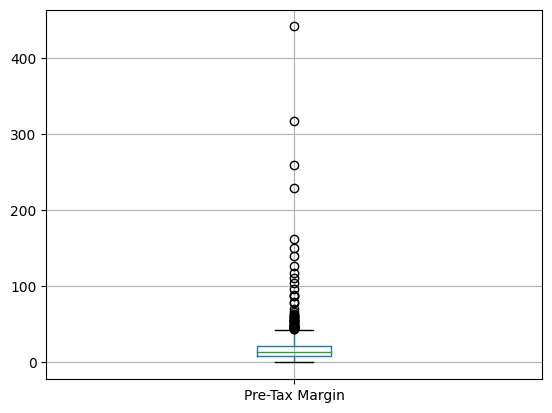

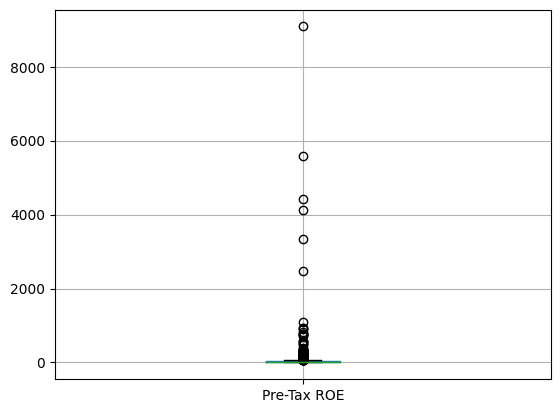

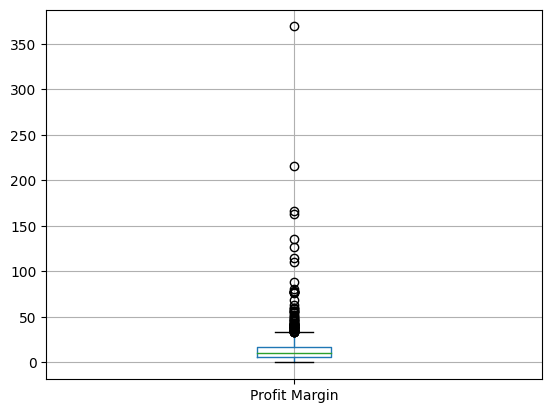

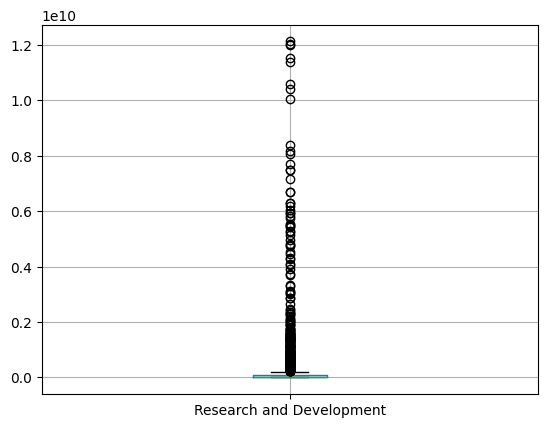

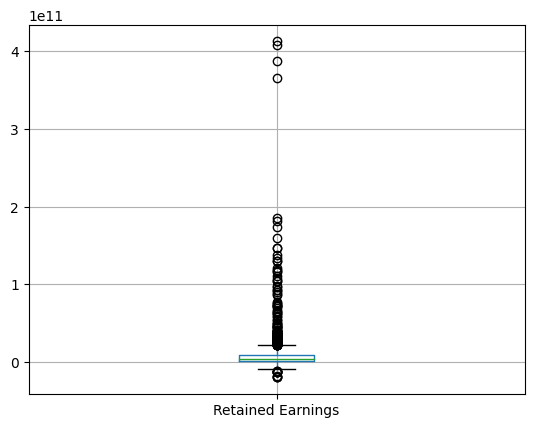

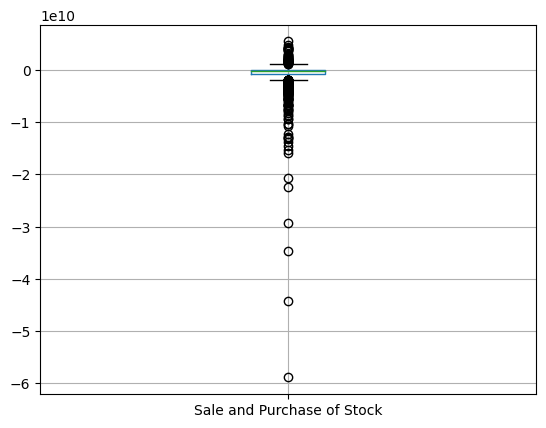

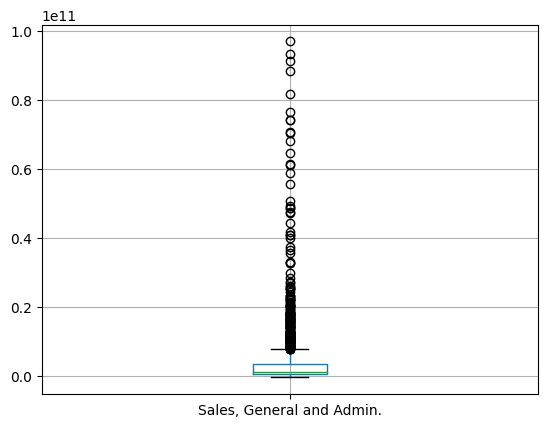

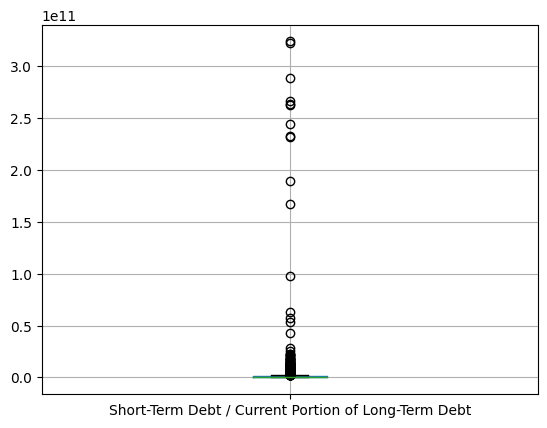

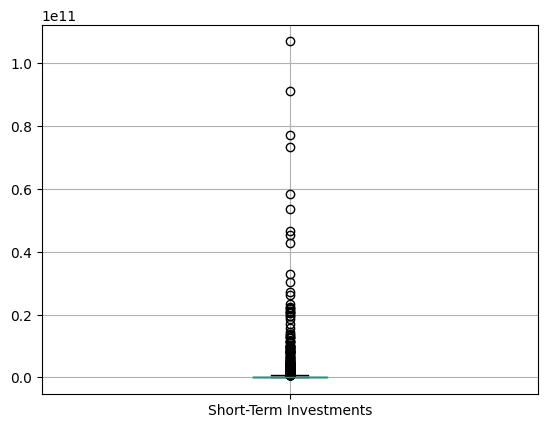

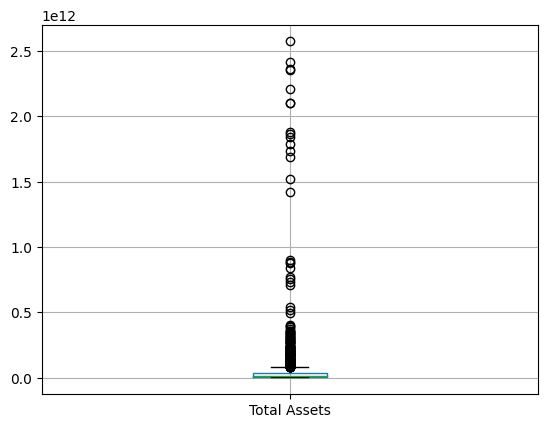

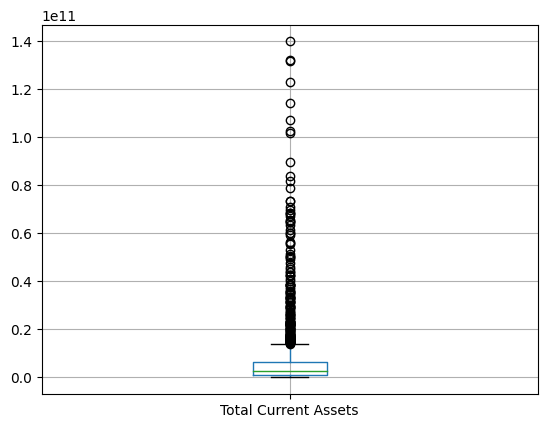

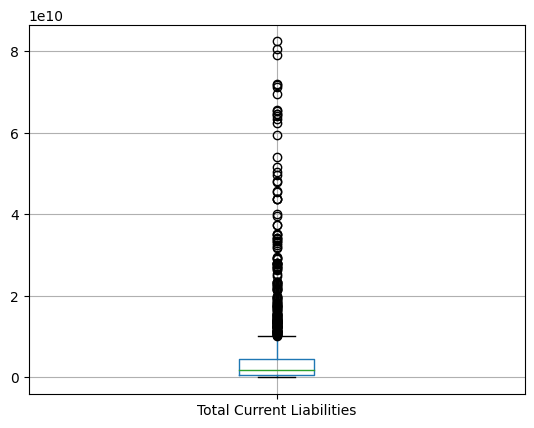

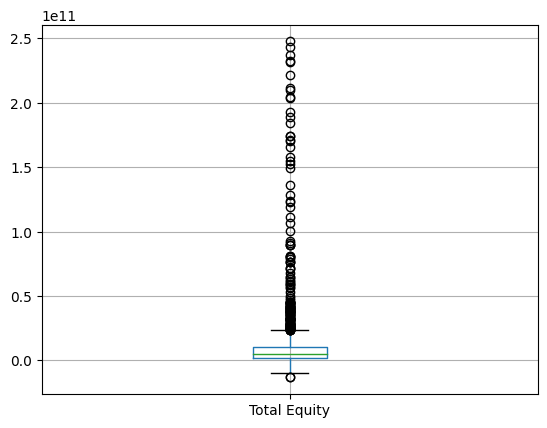

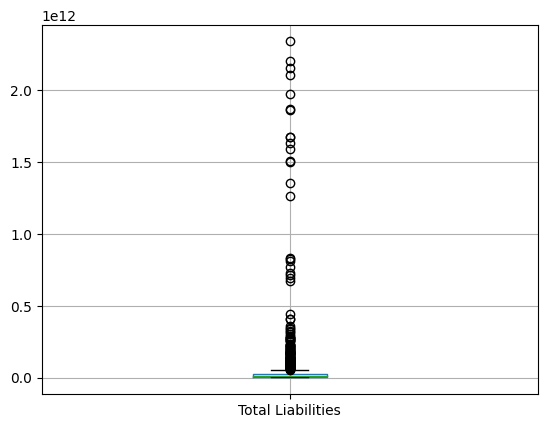

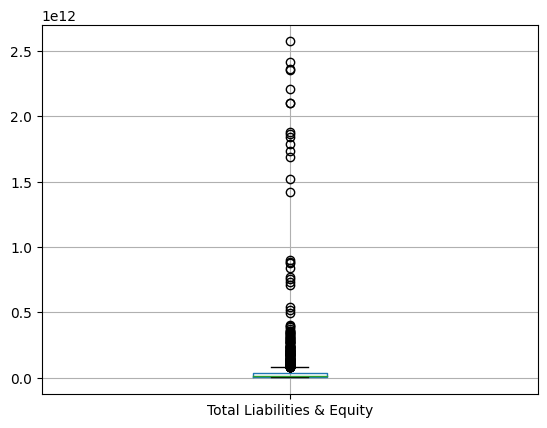

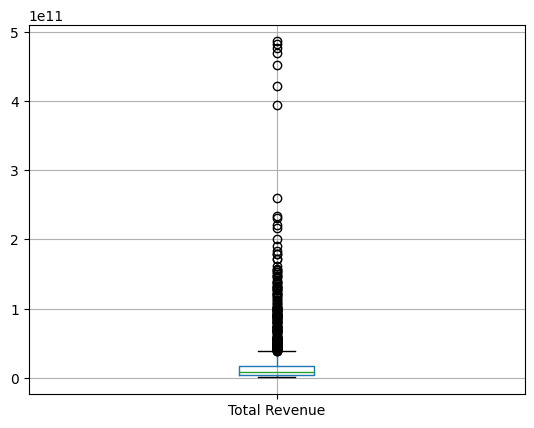

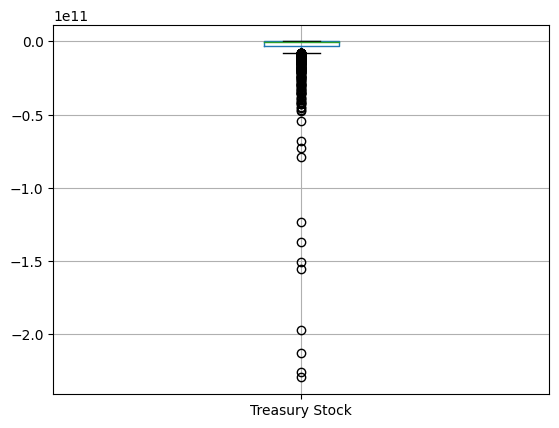

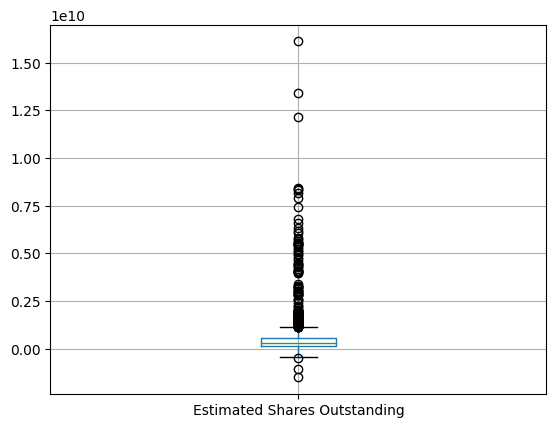

In [ ]:
for column in df2:
    plt.figure()
    df2.boxplot([column])

In [ ]:
# for column in df2:
#         plt.figure(figsize=(17,1))
#         sns.boxplot(data=df2, x=column)

Before Shape: (1562, 71)
After Shape: (1404, 71)


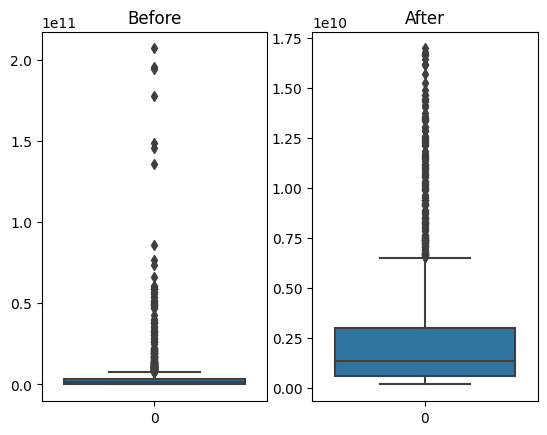

In [ ]:
# Handling Outlier for 'Accounts Payable' Using Percentiles

fig, axes = plt.subplots(1,2)
#plt.tight_layout(0.2)

## DataFrame
print("Before Shape:",df2.shape)
## Max and Min Quantile
max_val = df2['Accounts Payable'].quantile(0.95)
min_val = df2['Accounts Payable'].quantile(0.05)

## Removing all the outliers
df3 = df2[(df2['Accounts Payable']>min_val) & (df2['Accounts Payable']<max_val)]
## Visulization
print("After Shape:",df3.shape)

sns.boxplot(df2['Accounts Payable'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df3['Accounts Payable'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Previous Shape With Outlier:  (1562, 71)
520942500.0 3318250000.0
2797307500.0
-3675018750.0 7514211250.0
Shape After Removing Outliers: (1374, 71)


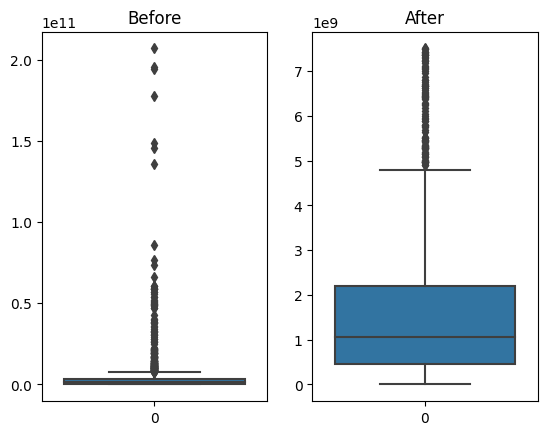

In [ ]:
# Handling Outlier for 'Accounts Payable' Using IQR

fig, axes = plt.subplots(1,2)

print("Previous Shape With Outlier: ",df2.shape)
sns.boxplot(df2['Accounts Payable'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

# Quantiles
Q1 = df2['Accounts Payable'].quantile(0.25)
Q3 = df2['Accounts Payable'].quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)

df4 = df2[(df2['Accounts Payable']>lower_limit) & (df2['Accounts Payable']<upper_limit)]
#df4['Accounts Payable'] = np.where(df4['Accounts Payable']>upper_limit,upper_limit,df4['Accounts Payable'])
#df4['Accounts Payable'] = np.where(df4['Accounts Payable']<lower_limit,lower_limit,df4['Accounts Payable'])
print("Shape After Removing Outliers:", df4.shape)
sns.boxplot(df4['Accounts Payable'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562 entries, 0 to 1779
Data columns (total 71 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Accounts Payable                                     1562 non-null   float64
 1   Accounts Receivable                                  1562 non-null   float64
 2   Add'l income/expense items                           1562 non-null   float64
 3   After Tax ROE                                        1562 non-null   float64
 4   Capital Expenditures                                 1562 non-null   float64
 5   Capital Surplus                                      1562 non-null   float64
 6   Cash and Cash Equivalents                            1562 non-null   float64
 7   Changes in Inventories                               1562 non-null   float64
 8   Common Stocks                                        1562 non-null  

**Q-Q Plots**

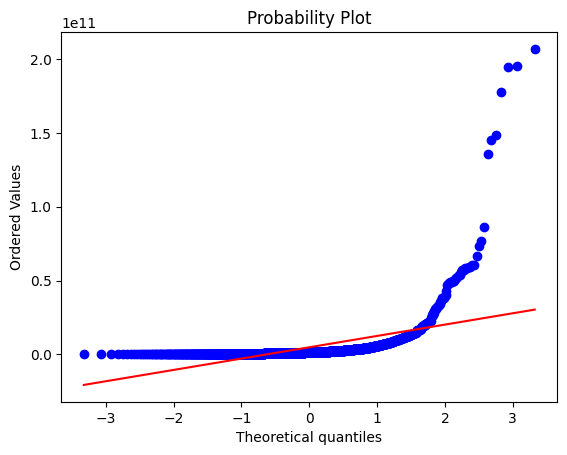

<Axes: >

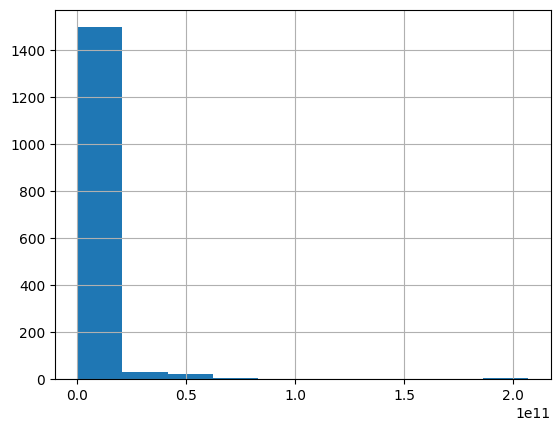

In [ ]:
# Data
data = df2
# create and show the plot.
stats.probplot(data["Accounts Payable"], dist="norm", plot=plt)
plt.show()

data["Accounts Payable"].hist()

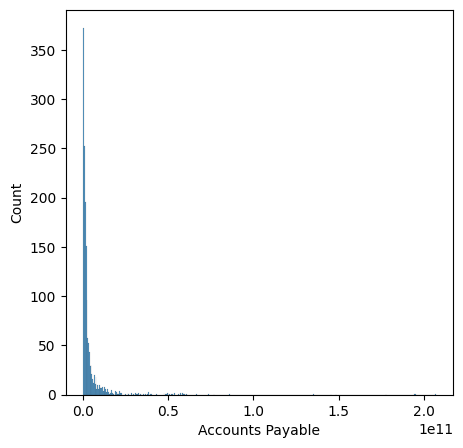

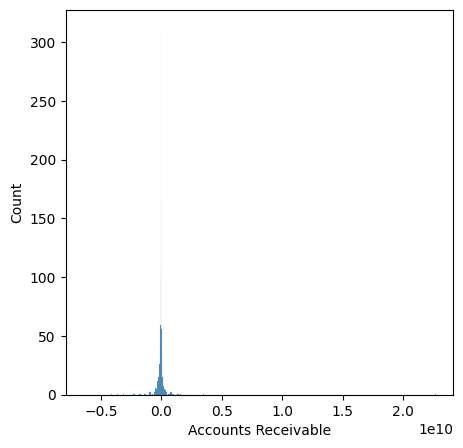

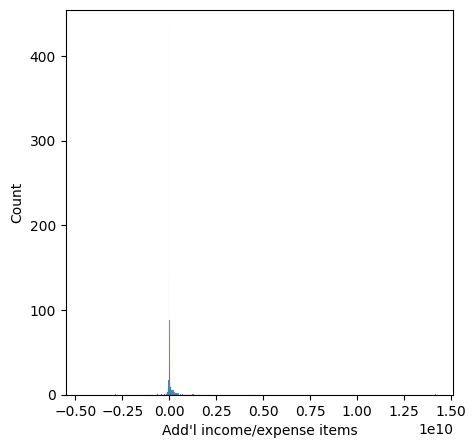

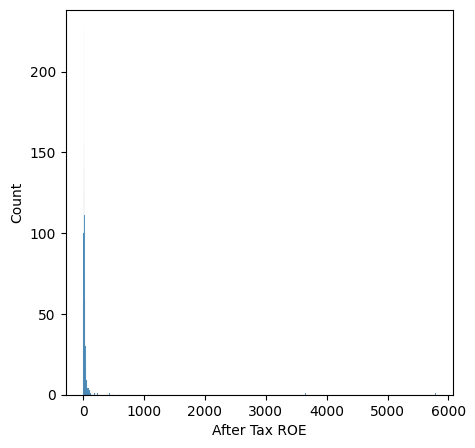

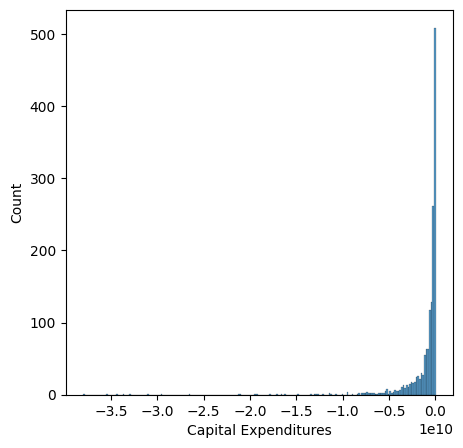

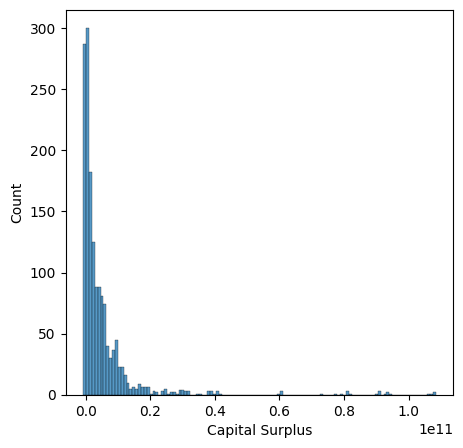

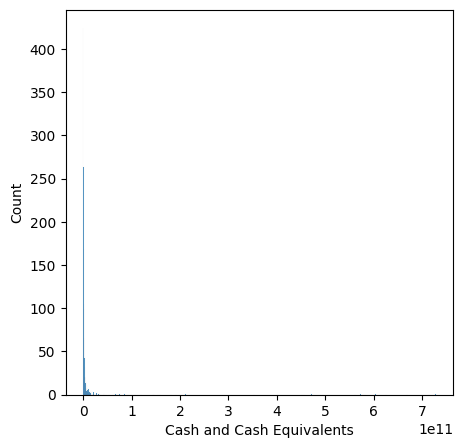

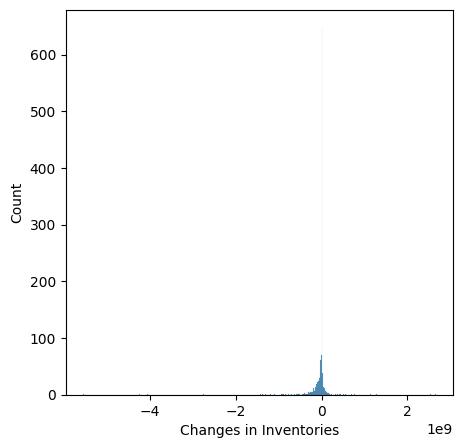

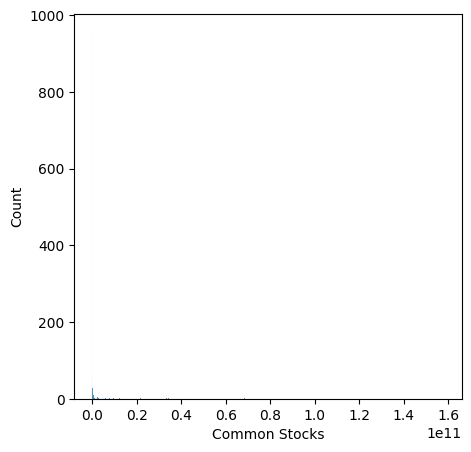

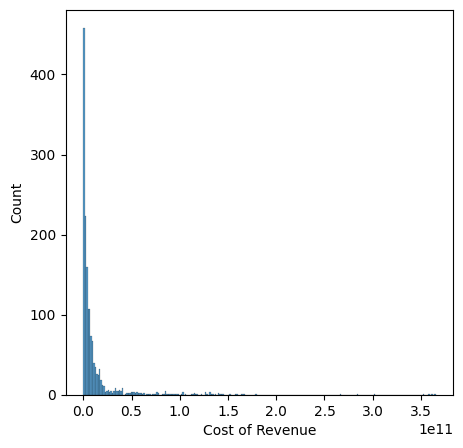

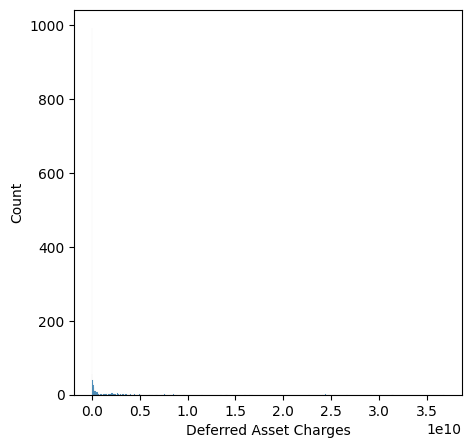

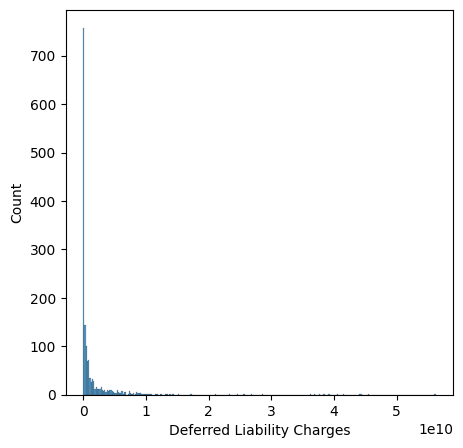

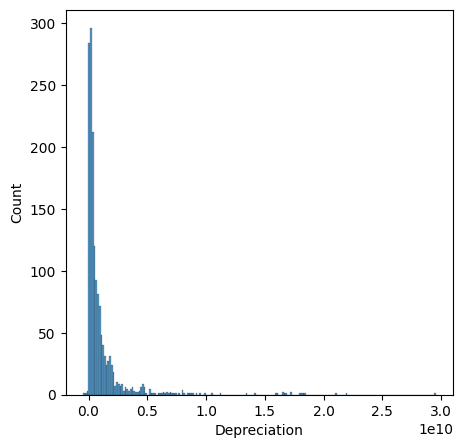

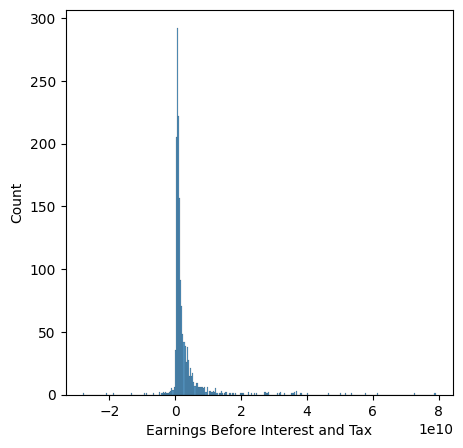

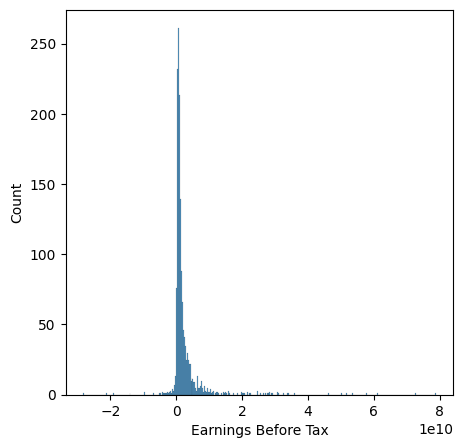

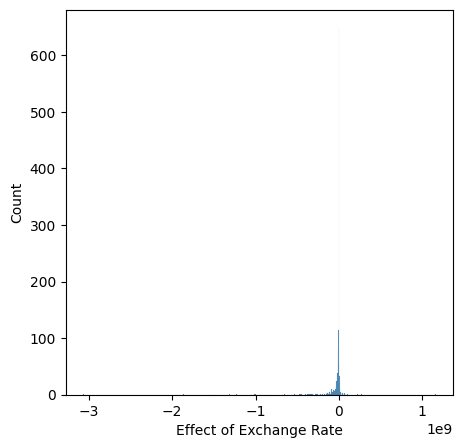

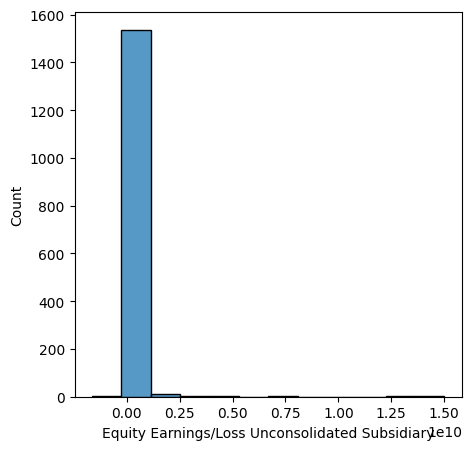

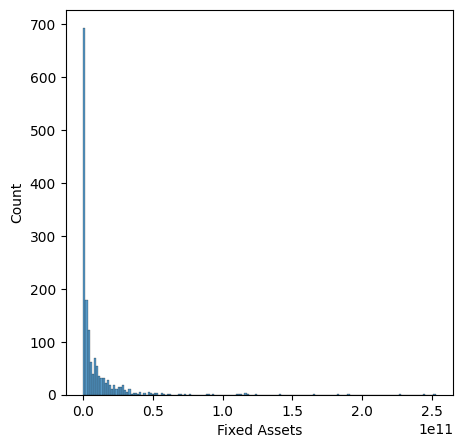

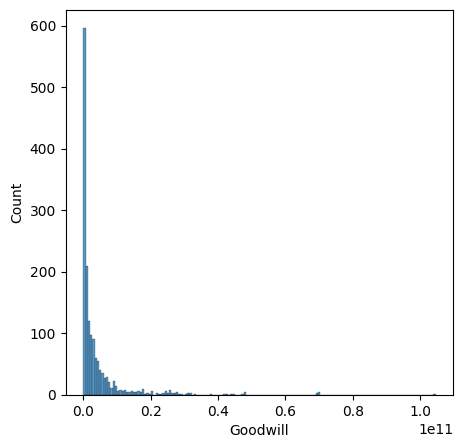

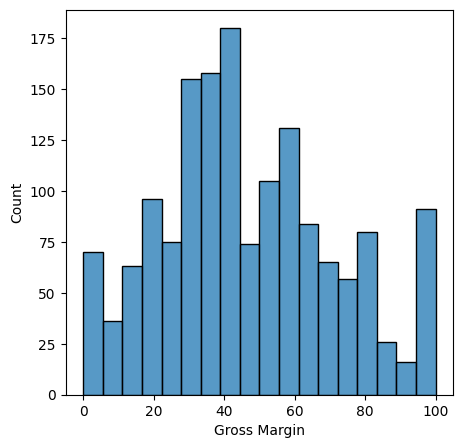

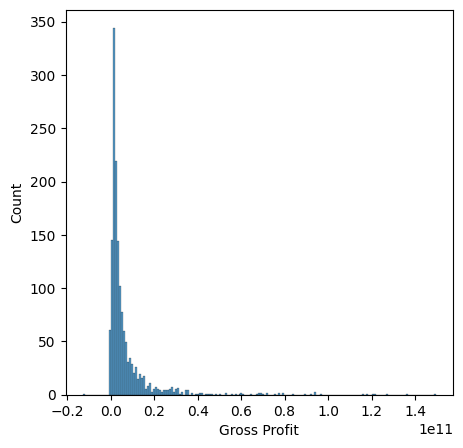

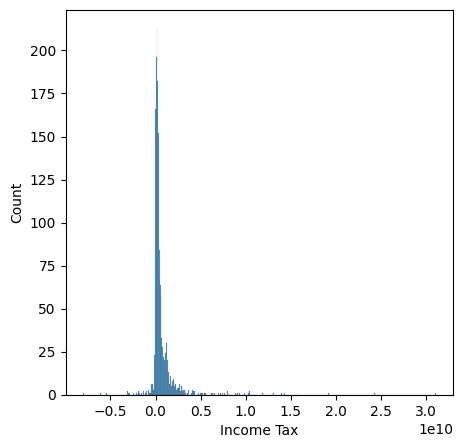

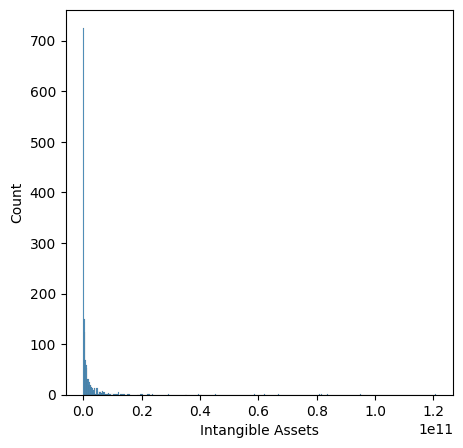

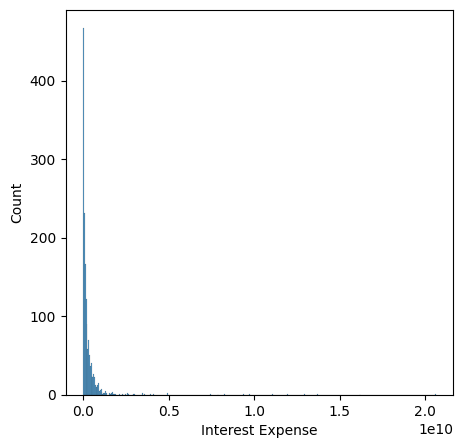

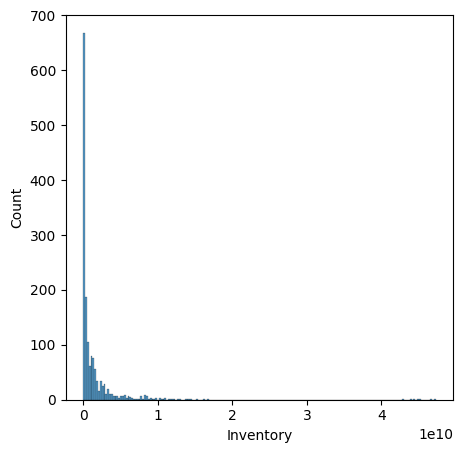

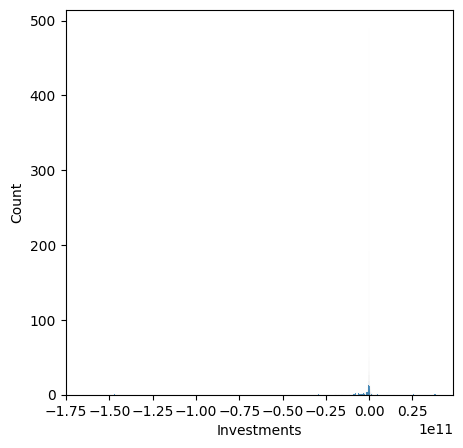

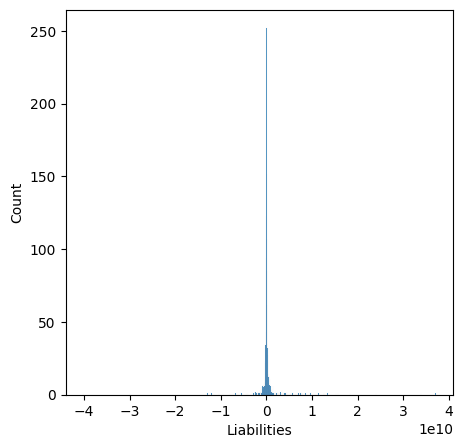

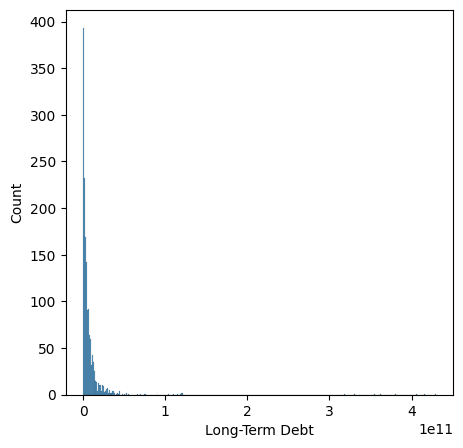

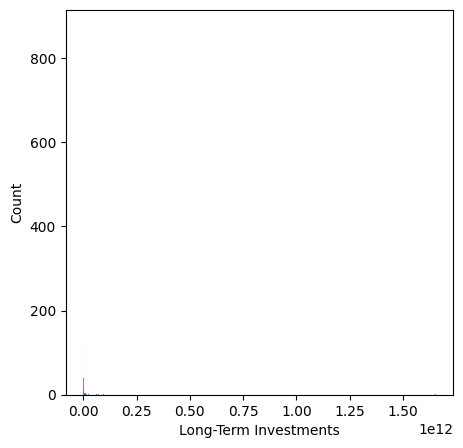

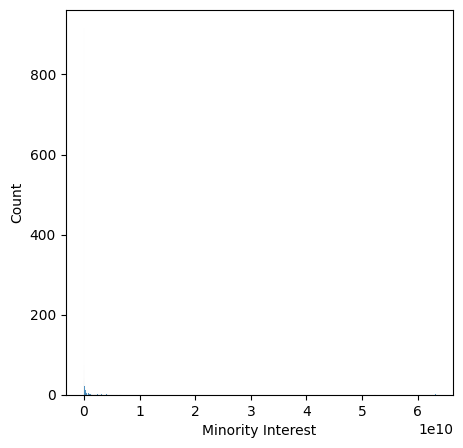

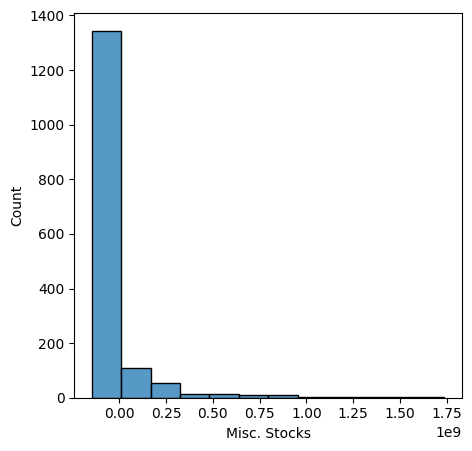

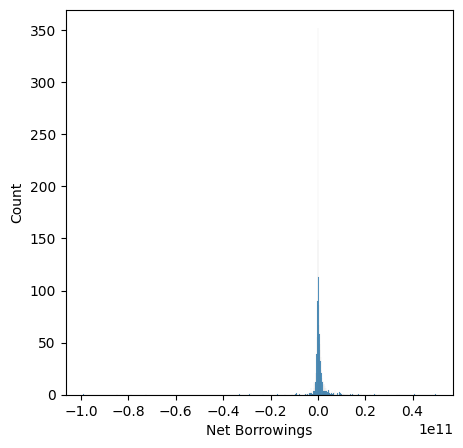

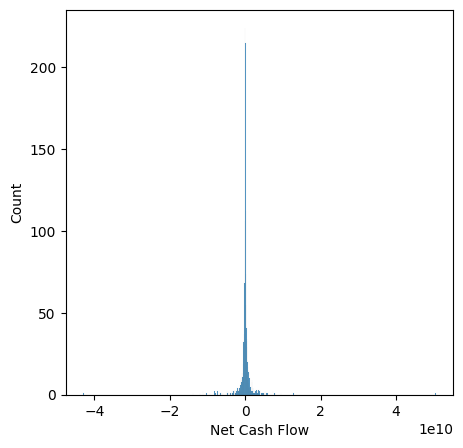

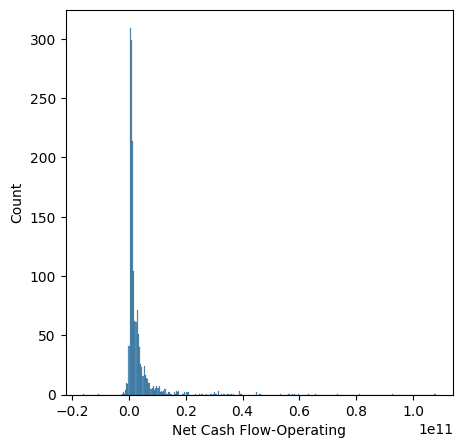

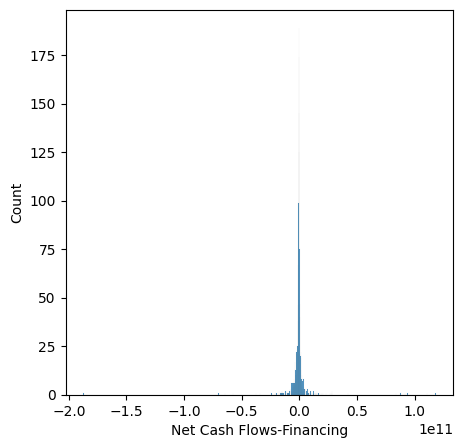

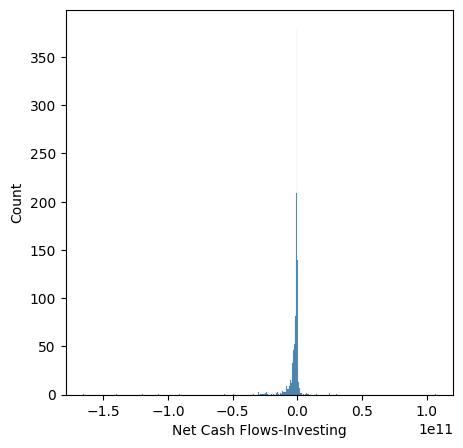

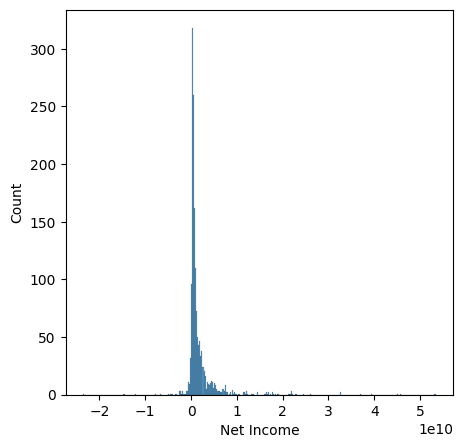

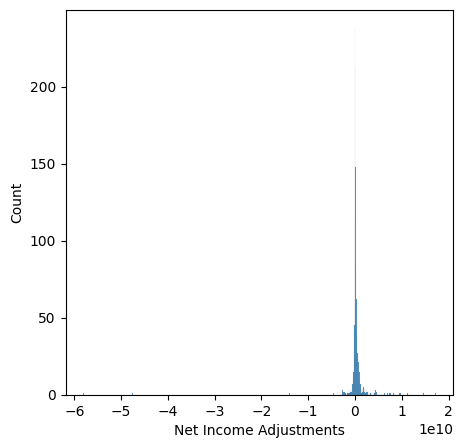

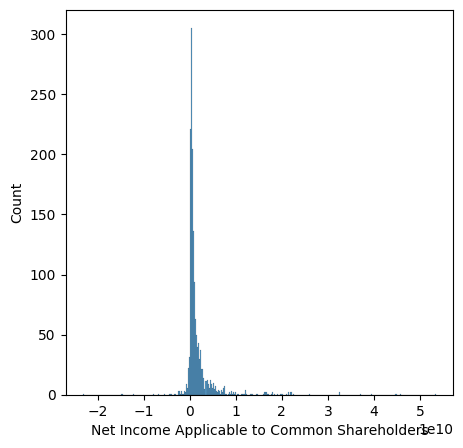

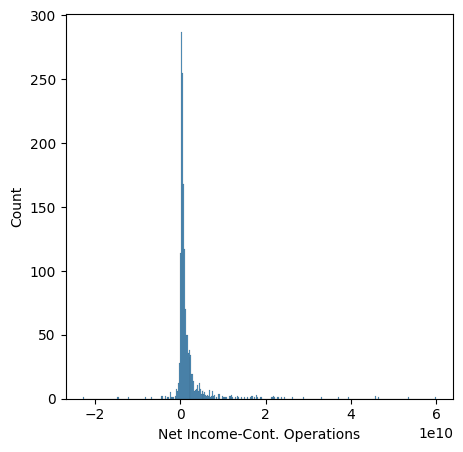

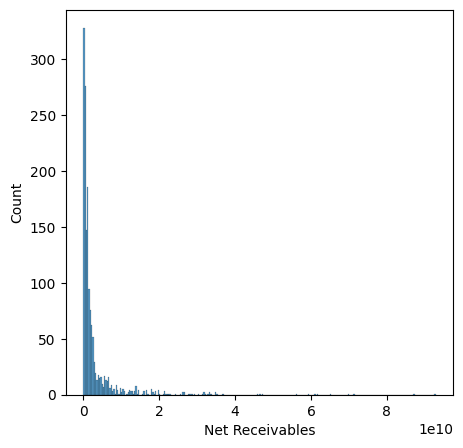

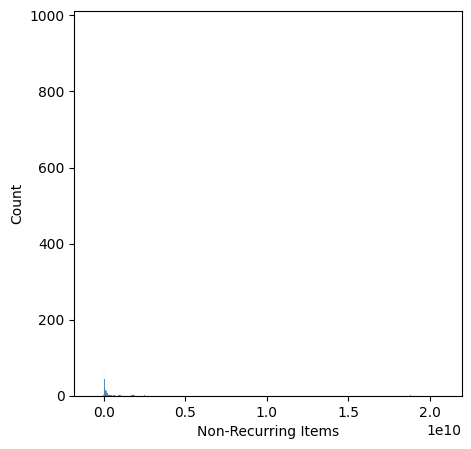

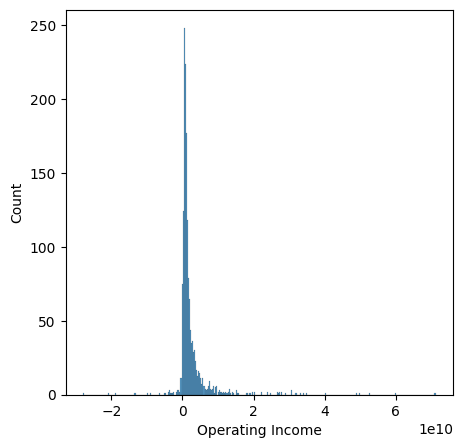

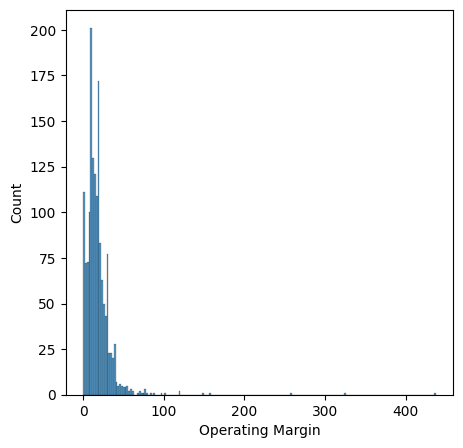

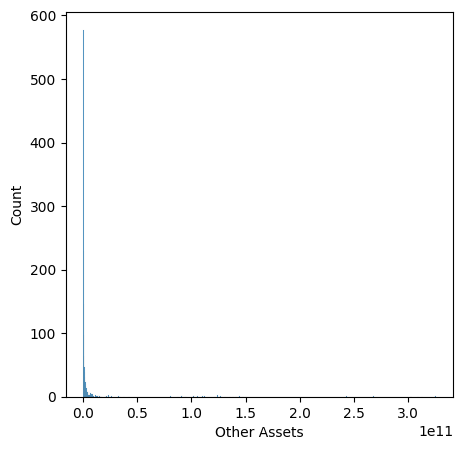

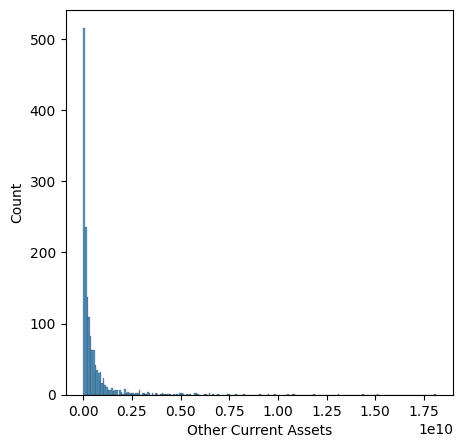

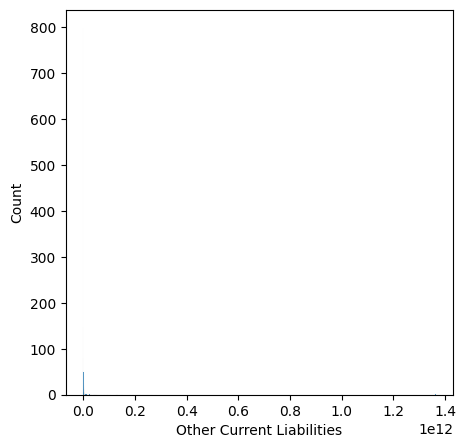

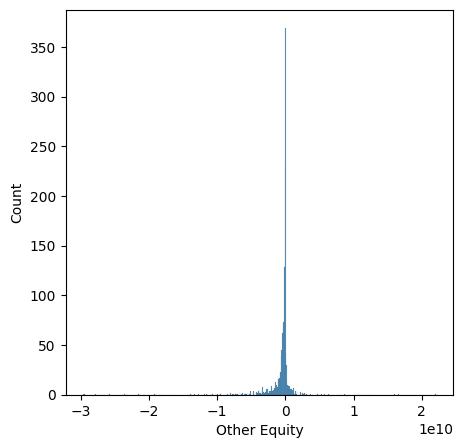

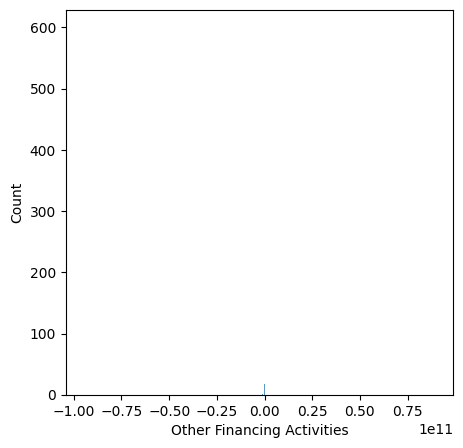

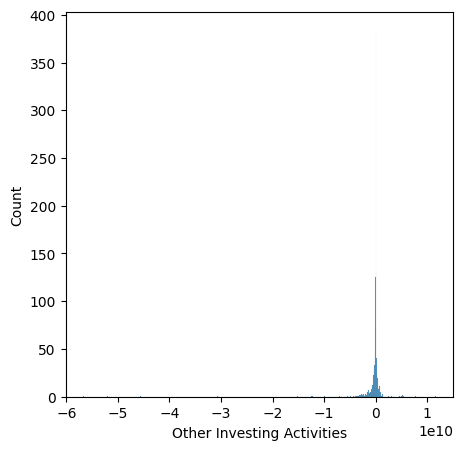

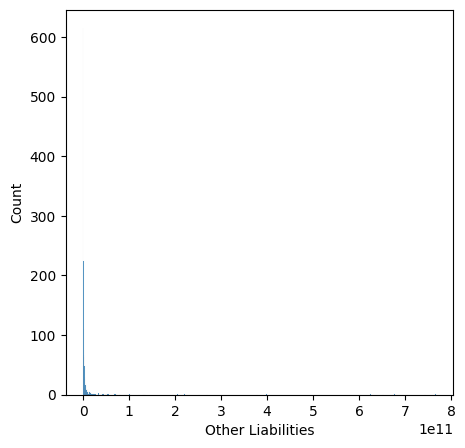

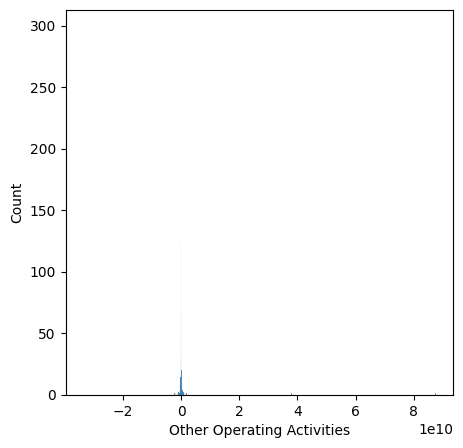

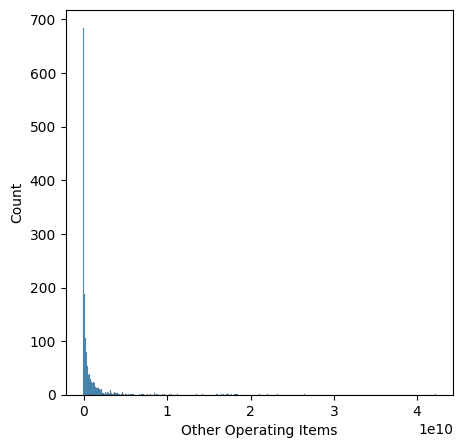

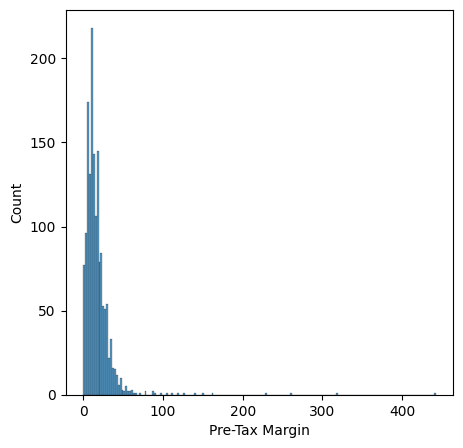

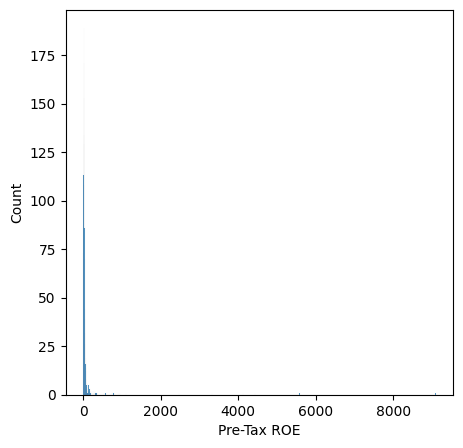

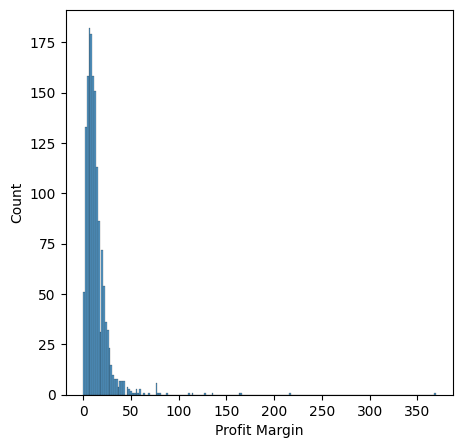

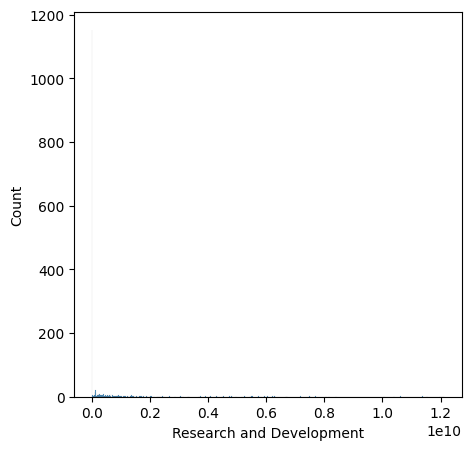

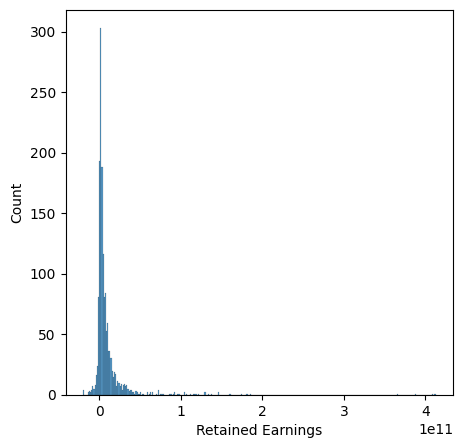

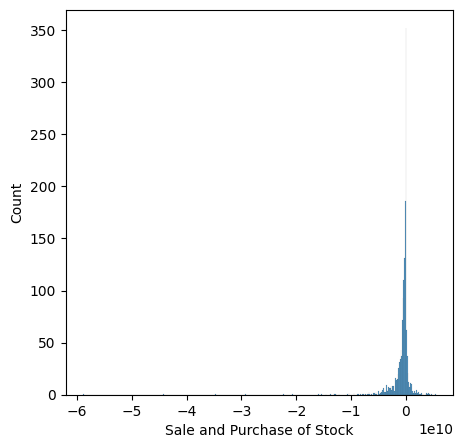

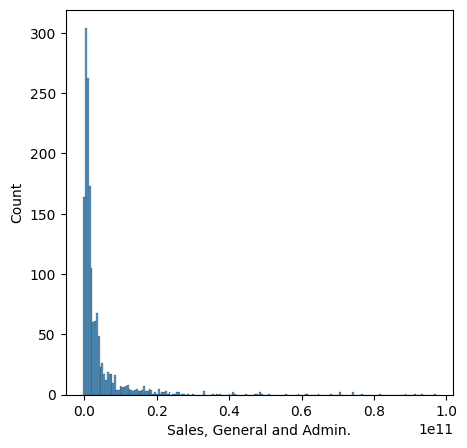

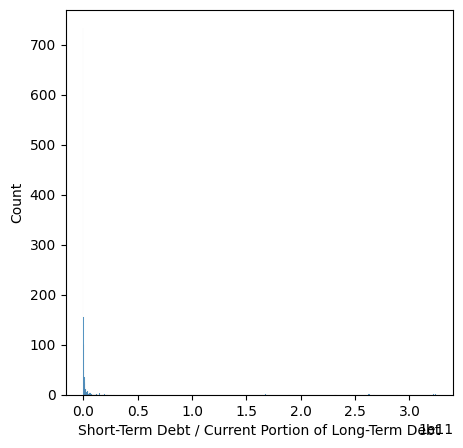

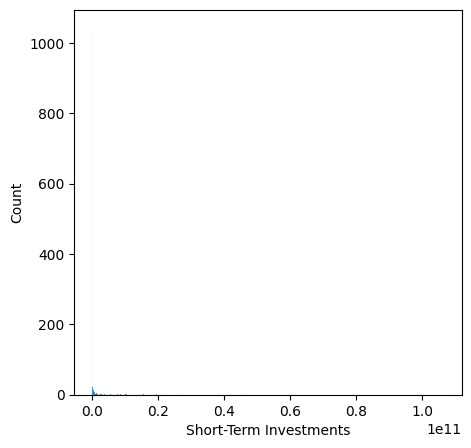

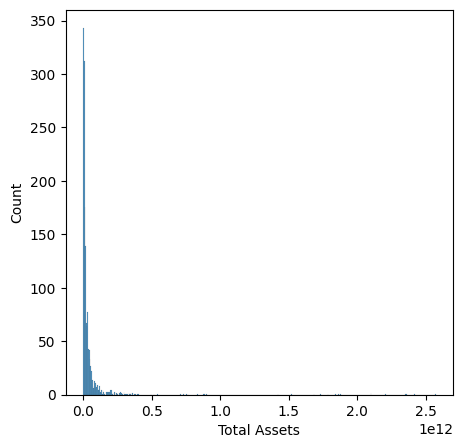

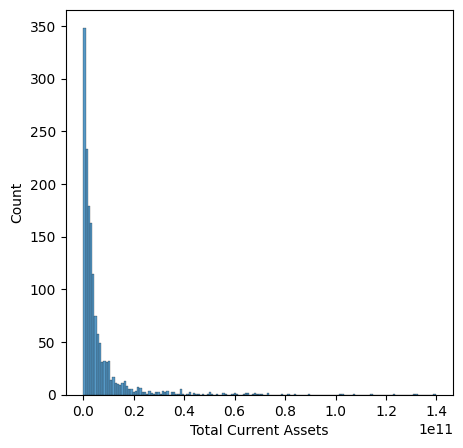

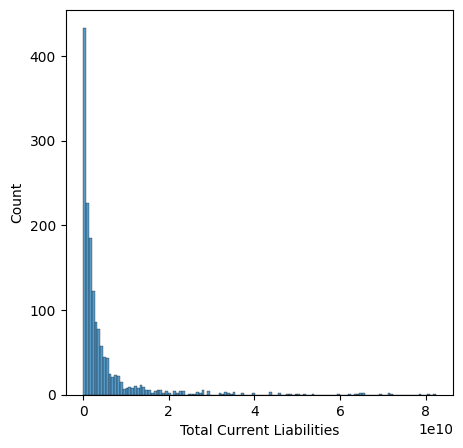

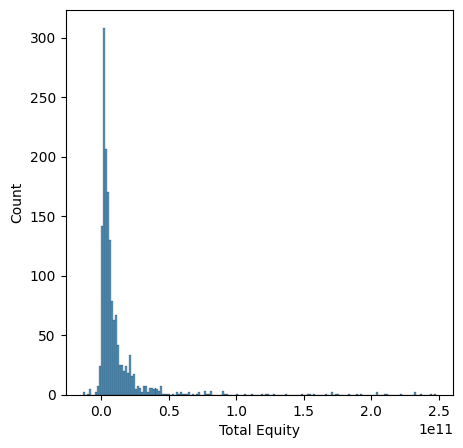

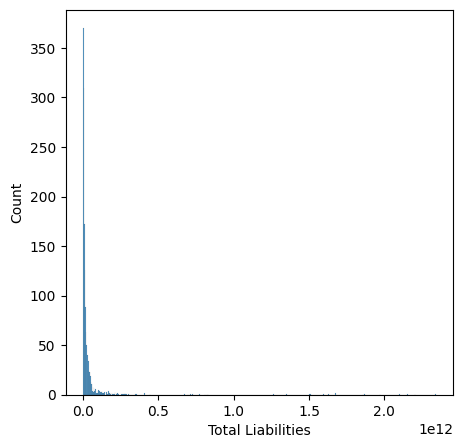

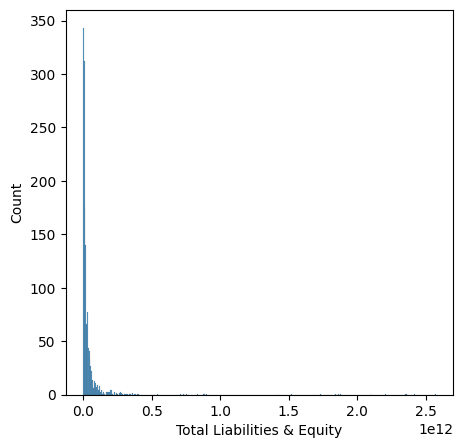

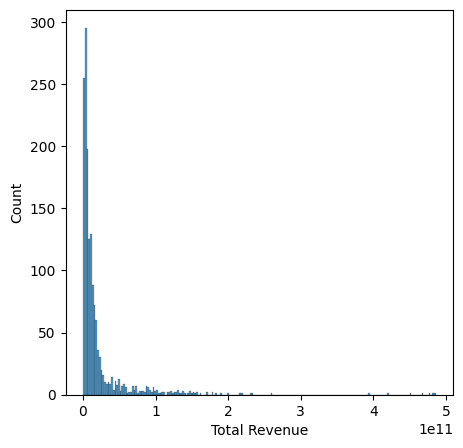

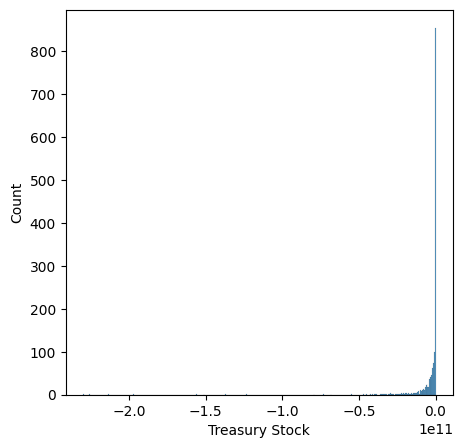

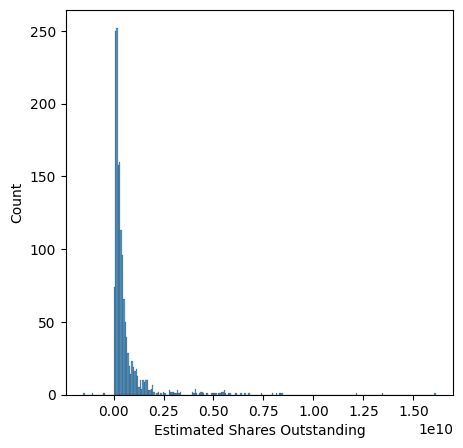

In [ ]:
for column in data:
        plt.figure(figsize=(5,5))
        sns.histplot(data=data, x=column)

array([[<Axes: title={'center': 'Accounts Payable'}>,
        <Axes: title={'center': 'Accounts Receivable'}>,
        <Axes: title={'center': "Add'l income/expense items"}>,
        <Axes: title={'center': 'After Tax ROE'}>,
        <Axes: title={'center': 'Capital Expenditures'}>,
        <Axes: title={'center': 'Capital Surplus'}>,
        <Axes: title={'center': 'Cash and Cash Equivalents'}>,
        <Axes: title={'center': 'Changes in Inventories'}>],
       [<Axes: title={'center': 'Common Stocks'}>,
        <Axes: title={'center': 'Cost of Revenue'}>,
        <Axes: title={'center': 'Deferred Asset Charges'}>,
        <Axes: title={'center': 'Deferred Liability Charges'}>,
        <Axes: title={'center': 'Depreciation'}>,
        <Axes: title={'center': 'Earnings Before Interest and Tax'}>,
        <Axes: title={'center': 'Earnings Before Tax'}>,
        <Axes: title={'center': 'Effect of Exchange Rate'}>],
       [<Axes: title={'center': 'Equity Earnings/Loss Unconsolidated Sub

<Figure size 640x480 with 0 Axes>

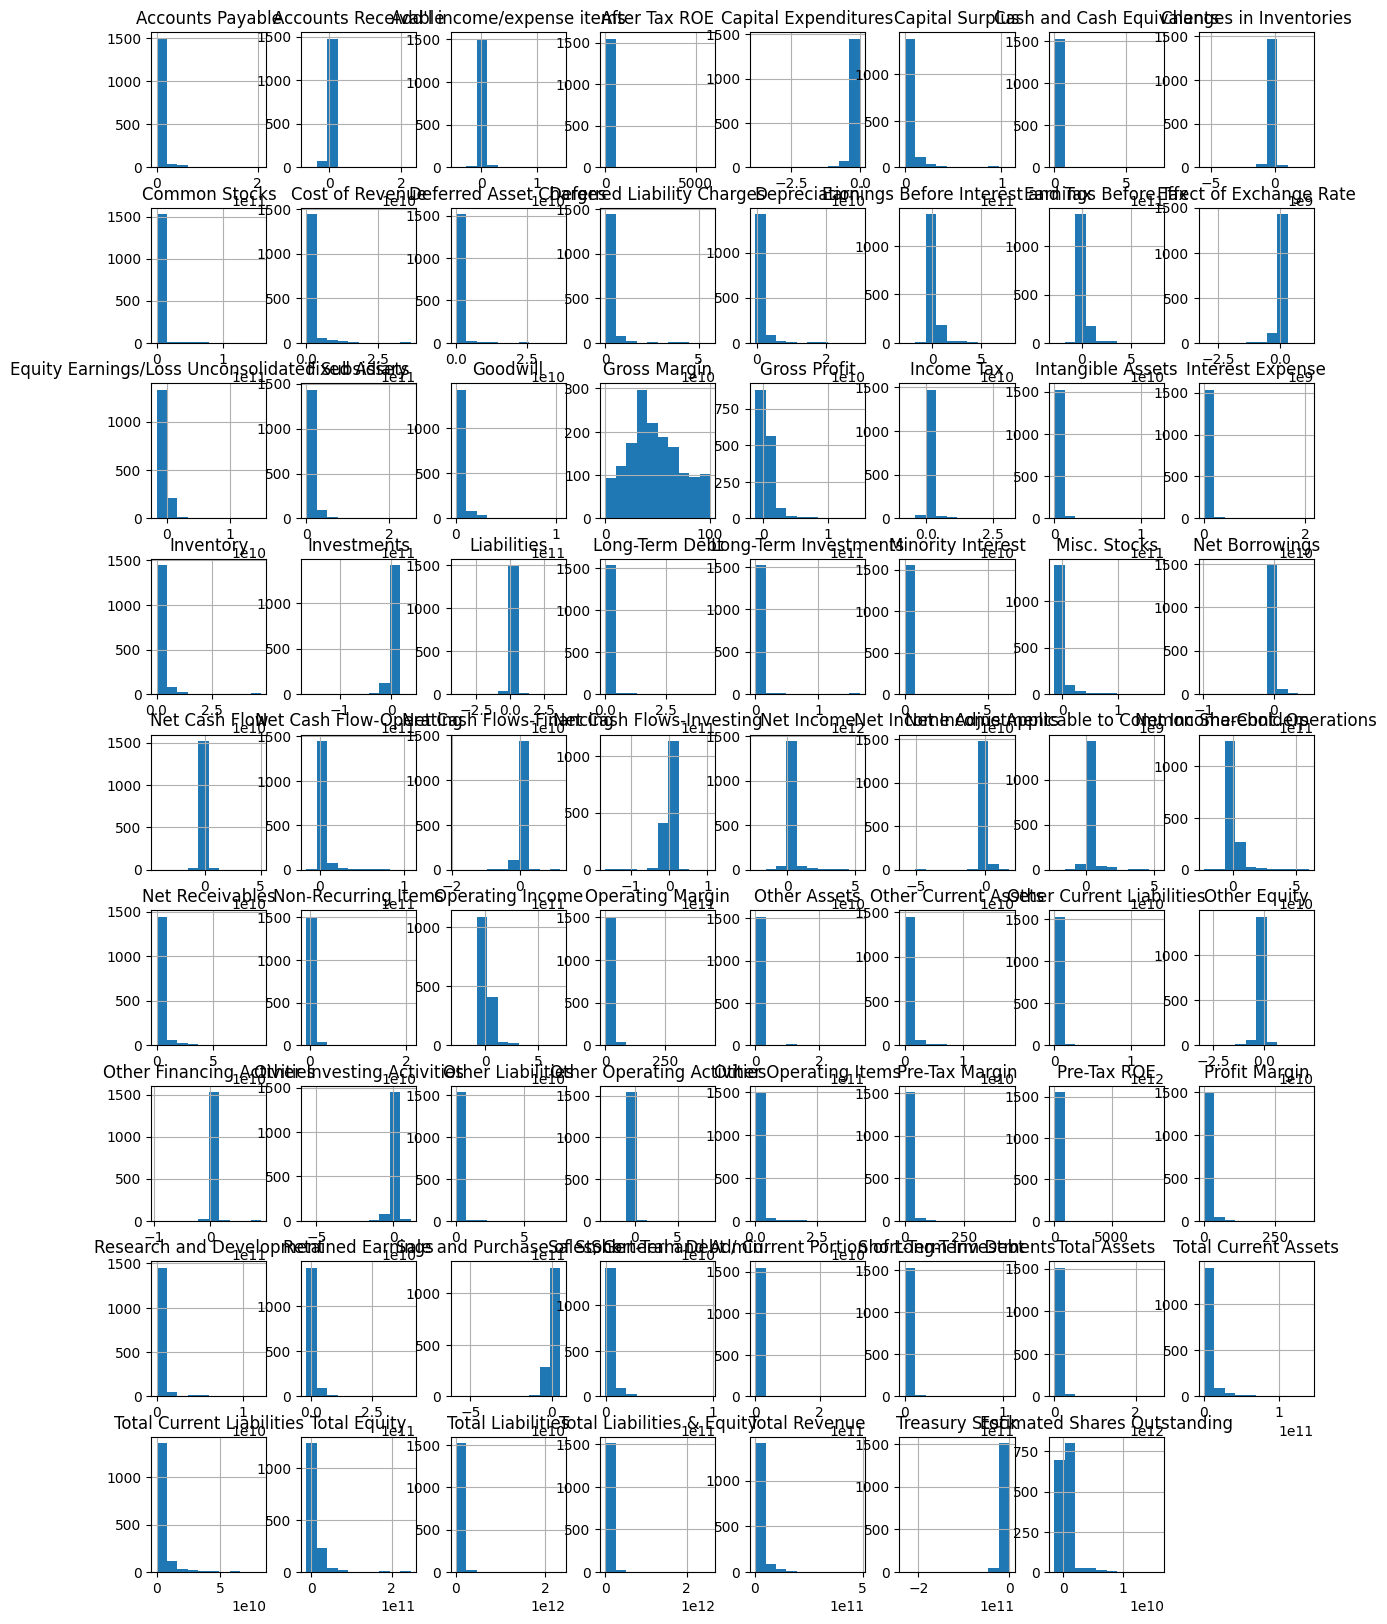

In [ ]:
plt.tight_layout()
df2.hist(figsize=(15,20))

**Transformation for skewed data**

array([[<Axes: title={'center': '0'}>]], dtype=object)

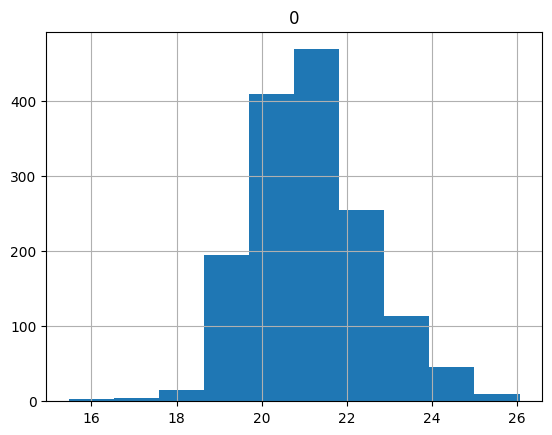

In [ ]:
# Logarithm Transformation
##### Don't do for features with valid 0 values
logarithm_transformer = FunctionTransformer(np.log, validate=True)

# load your data
data1 = df2["Accounts Payable"]
data1 = data1.replace(0, np.nan) #replace 0 s with nan because ln
data1 = data1.dropna() #drop all nan
data1 = data1.array.reshape(-1, 1) # reshape when there is single feature only

# apply the transformation to needed features
# columns = ["Accounts Payable"]
data_new = logarithm_transformer.transform(data1)

data_new = pd.DataFrame(data_new)
data_new.hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

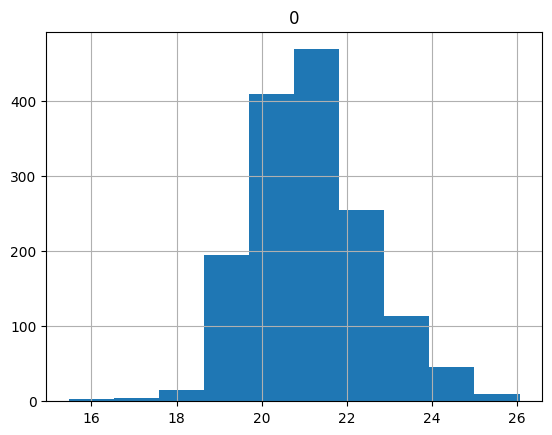

In [ ]:
# Exponential Transformation

exponential_transformer = FunctionTransformer(np.exp)

# load your data
data1 = df2["Accounts Payable"]
# data1 = data1.replace(0, np.nan) #replace 0 s with nan because ln
# data1 = data1.dropna() #drop all nan
# data1 = data1.array.reshape(-1, 1) # reshape when there is single feature only

# apply the transformation to needed features
# columns = ["Accounts Payable"]
data_new2 = exponential_transformer.transform(data1)

data_new2 = pd.DataFrame(data_new)
data_new2.hist()

Add any transformed features to the dataframe and drop the original variable

**Feature Coding**

In [ ]:
# One-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)

# Encode 'ticker_symbol' feature
from numpy import array
df3 = array(df1['Ticker Symbol'])
df3 = df3.reshape(-1, 1) # reshape when there is single feature only
ticker_encoded = onehot_encoder.fit_transform(df3)

print(ticker_encoded)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
ticker_encoded = pd.DataFrame(ticker_encoded)
ticker_encoded

0    1    2    3    4    5    6    7    8    9    10   11   12   13   \
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1557  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1558  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1559  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1560  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1561  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      14   15   16   17   18   19   20   21   22   23   24   25   26   27   \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1557  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1558  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1559  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1560  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1561  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      28   29   30   31   32   33   34   35   36   37   38   39   40   41   \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1557  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1558  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1559  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1560  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1561  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      42   43   44   45   46   47   48   49   ...  382  383  384  385  386  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1557  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
1558  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
1559  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
1560  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
1561  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   

      387  388  389  390  391  392  393  394  395  396  397  398  399  400  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

df3 = pd.DataFrame(df1['Ticker Symbol'])

df3['Ticker Symbol Cat'] = labelencoder.fit_transform(df3)
df3

Ticker Symbol  Ticker Symbol Cat
0              AAL                  0
1              AAL                  0
2              AAL                  0
3              AAL                  0
4              AAP                  1
...            ...                ...
1775          ZION                430
1776          ZION                430
1777           ZTS                431
1778           ZTS                431
1779           ZTS                431

[1562 rows x 2 columns]

Can add categorical variable after Scaling/ standardizing

**Scaling / Standardizing**

In [ ]:
df2.describe()

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
count      1.562000e+03         1.562000e+03                1.562000e+03   
mean       4.755001e+09        -6.228927e+07                7.784332e+07   
std        1.434494e+10         7.872964e+08                7.029550e+08   
min        0.000000e+00        -6.452000e+09               -4.577000e+09   
25%        5.209425e+08        -9.910800e+07               -2.000000e+06   
50%        1.335500e+09        -1.696300e+07                2.575000e+06   
75%        3.318250e+09         9.000000e+06                3.426075e+07   
max        2.069390e+11         2.266400e+10                1.416200e+10   

       After Tax ROE  Capital Expenditures  Capital Surplus  \
count    1562.000000          1.562000e+03     1.562000e+03   
mean       41.108835         -1.288402e+09     5.401006e+09   
std       228.291868          3.119244e+09     1.165717e+10   
min         0.000000         -3.798500e+10    -7.215000e+08   
25%        10.000000         -1.164533e+09     4.902875e+08   
50%        16.000000         -3.647495e+08     2.027581e+09   
75%        26.000000         -1.301750e+08     5.701354e+09   
max      5789.000000          5.000000e+06     1.082880e+11   

       Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
count               1.562000e+03            1.562000e+03   1.562000e+03   
mean                8.893754e+09           -7.348106e+07   1.579299e+09   
std                 5.572605e+10            3.957166e+08   8.903012e+09   
min                 2.100000e+04           -5.562000e+09   0.000000e+00   
25%                 3.001105e+08           -5.397500e+07   1.770500e+06   
50%                 8.810195e+08            0.000000e+00   8.000000e+06   
75%                 2.302500e+09            0.000000e+00   2.987500e+08   
max                 7.281110e+11            2.658000e+09   1.581420e+11   

       Cost of Revenue  Deferred Asset Charges  Deferred Liability Charges  \
count     1.562000e+03            1.562000e+03                1.562000e+03   
mean      1.265495e+10            5.752012e+08                1.658260e+09   
std       3.140544e+10            2.593878e+09                4.700252e+09   
min       0.000000e+00            0.000000e+00                0.000000e+00   
25%       1.231481e+09            0.000000e+00                0.000000e+00   
50%       3.788012e+09            0.000000e+00                2.139005e+08   
75%       9.854250e+09            1.452482e+08                1.140000e+09   
max       3.650860e+11            3.686000e+10                5.618100e+10   

       Depreciation  Earnings Before Interest and Tax  Earnings Before Tax  \
count  1.562000e+03                      1.562000e+03         1.562000e+03   
mean   1.091195e+09                      2.783698e+09         2.444407e+09   
std    2.257567e+09                      6.424306e+09         5.995160e+09   
min   -4.480000e+08                     -2.792700e+10        -2.822600e+10   
25%    1.856432e+08                      5.976000e+08         4.963720e+08   
50%    4.204000e+08                      1.138474e+09         9.605585e+08   
75%    1.040750e+09                      2.539000e+09         2.233250e+09   
max    2.951700e+10                      7.905300e+10         7.872600e+10   

       Effect of Exchange Rate  \
count             1.562000e+03   
mean             -3.983635e+07   
std               1.706450e+08   
min              -3.067000e+09   
25%              -1.987625e+07   
50%              -5.435000e+05   
75%               0.000000e+00   
max               1.160000e+09   

       Equity Earnings/Loss Unconsolidated Subsidiary  Fixed Assets  \
count                                    1.562000e+03  1.562000e+03   
mean                                     9.506901e+07  8.710189e+09   
std                                      7.647975e+08  1.998988e+10   
min                                     -1.633000e+09  0.000000e+00   
25%       

In [ ]:
infeatures = df2.iloc[:,0:69] #Select Independant numerical variables
target = df2.iloc[:,70] #Select response variable

In [ ]:
x = np.array(infeatures)
y = np.array(target)
y = np.reshape(y, (-1, 1))

In [ ]:
# Scaling Data using MinMax Scaler
# Make scaler objects
scaler_infeatures = MinMaxScaler(feature_range=(0,1))
scaler_target = MinMaxScaler()

# Scaled data
infeatures_scaled = scaler_infeatures.fit_transform(x)
target_scaled = scaler_target.fit_transform(y)

DF_x = pd.DataFrame(infeatures_scaled, columns = infeatures.columns)
DF_y = pd.DataFrame(target_scaled, columns=['Estimated Shares Outstanding'])

In [ ]:
DF_x.describe()

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
count       1562.000000          1562.000000                 1562.000000   
mean           0.022978             0.219457                    0.248404   
std            0.069320             0.027040                    0.037513   
min            0.000000             0.000000                    0.000000   
25%            0.002517             0.218192                    0.244143   
50%            0.006454             0.221014                    0.244387   
75%            0.016035             0.221905                    0.246078   
max            1.000000             1.000000                    1.000000   

       After Tax ROE  Capital Expenditures  Capital Surplus  \
count    1562.000000           1562.000000      1562.000000   
mean        0.007101              0.965954         0.056165   
std         0.039435              0.082107         0.106937   
min         0.000000              0.000000         0.000000   
25%         0.001727              0.969215         0.011116   
50%         0.002764              0.990267         0.025219   
75%         0.004491              0.996442         0.058920   
max         1.000000              1.000000         1.000000   

       Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
count                1562.000000             1562.000000    1562.000000   
mean                    0.012215                0.667703       0.009987   
std                     0.076535                0.048141       0.056298   
min                     0.000000                0.000000       0.000000   
25%                     0.000412                0.670076       0.000011   
50%                     0.001210                0.676642       0.000051   
75%                     0.003162                0.676642       0.001889   
max                     1.000000                1.000000       1.000000   

       Cost of Revenue  Deferred Asset Charges  Deferred Liability Charges  \
count      1562.000000             1562.000000                 1562.000000   
mean          0.034663                0.015605                    0.029516   
std           0.086022                0.070371                    0.083663   
min           0.000000                0.000000                    0.000000   
25%           0.003373                0.000000                    0.000000   
50%           0.010376                0.000000                    0.003807   
75%           0.026992                0.003941                    0.020292   
max           1.000000                1.000000                    1.000000   

       Depreciation  Earnings Before Interest and Tax  Earnings Before Tax  \
count   1562.000000                       1562.000000          1562.000000   
mean       0.051366                          0.287070             0.286768   
std        0.075340                          0.060051             0.056055   
min        0.000000                          0.000000             0.000000   
25%        0.021146                          0.266635             0.268554   
50%        0.028980                          0.271691             0.272894   
75%        0.049683                          0.284782             0.284794   
max        1.000000                          1.000000             1.000000   

       Effect of Exchange Rate  \
count              1562.000000   
mean                  0.716149   
std                   0.040370   
min                   0.000000   
25%                   0.720871   
50%                   0.725445   
75%                   0.725574   
max                   1.000000   

       Equity Earnings/Loss Unconsolidated Subsidiary  Fixed Assets  \
count                                     1562.000000   1562.000000   
mean                                         0.103832      0.034473   
std                                          0.045953      0.079115   
min                                          0.000000      0.000000   
25%       

array([[<Axes: title={'center': 'Accounts Payable'}>,
        <Axes: title={'center': 'Accounts Receivable'}>,
        <Axes: title={'center': "Add'l income/expense items"}>,
        <Axes: title={'center': 'After Tax ROE'}>,
        <Axes: title={'center': 'Capital Expenditures'}>,
        <Axes: title={'center': 'Capital Surplus'}>,
        <Axes: title={'center': 'Cash and Cash Equivalents'}>,
        <Axes: title={'center': 'Changes in Inventories'}>],
       [<Axes: title={'center': 'Common Stocks'}>,
        <Axes: title={'center': 'Cost of Revenue'}>,
        <Axes: title={'center': 'Deferred Asset Charges'}>,
        <Axes: title={'center': 'Deferred Liability Charges'}>,
        <Axes: title={'center': 'Depreciation'}>,
        <Axes: title={'center': 'Earnings Before Interest and Tax'}>,
        <Axes: title={'center': 'Earnings Before Tax'}>,
        <Axes: title={'center': 'Effect of Exchange Rate'}>],
       [<Axes: title={'center': 'Equity Earnings/Loss Unconsolidated Sub

<Figure size 640x480 with 0 Axes>

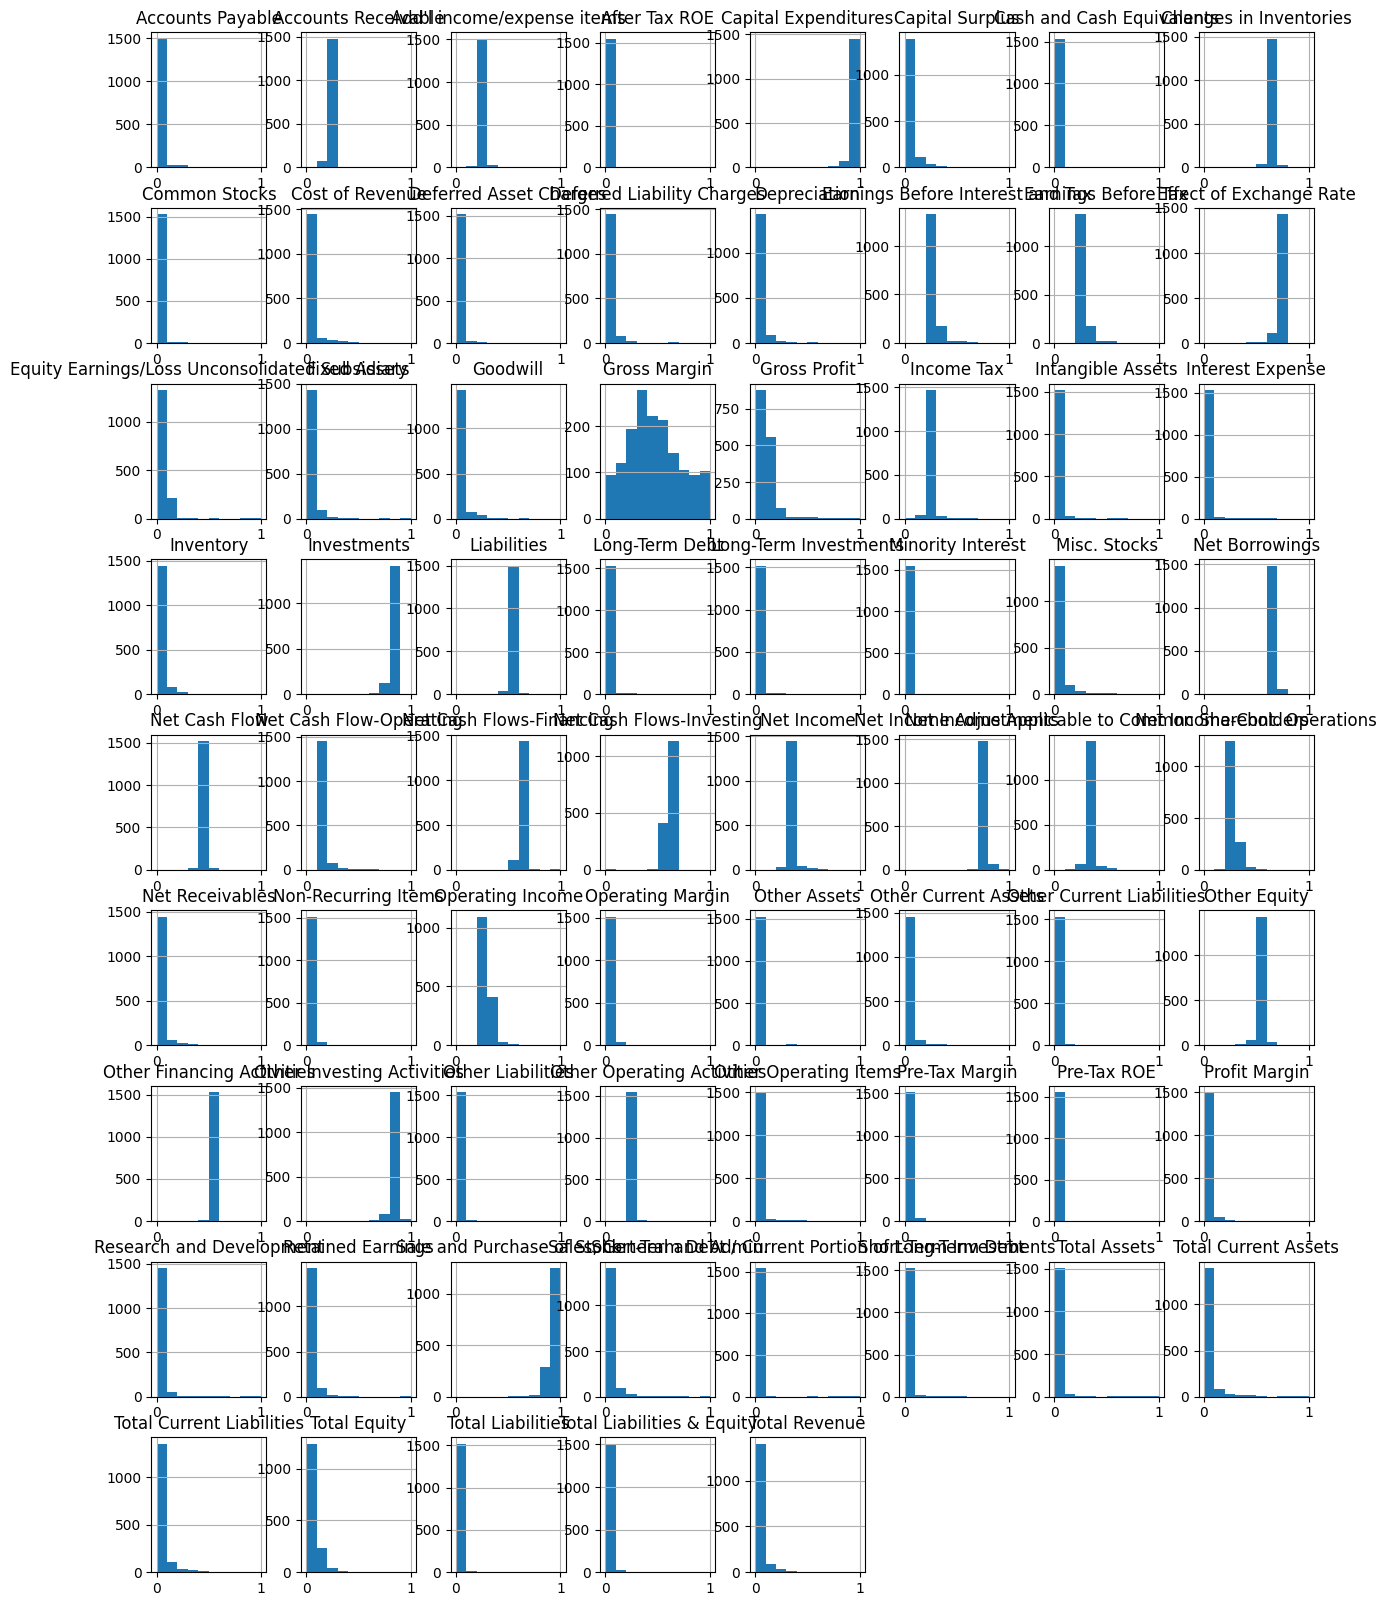

In [ ]:
plt.tight_layout()
DF_x.hist(figsize=(15,20))

In [ ]:
# Scaling Data using StandardScaler
# Make scaler objects
s_scaler_infeatures = StandardScaler()
s_scaler_target = StandardScaler()

# Scaled data
infeatures_scaled_s = s_scaler_infeatures.fit_transform(x)
target_scaled_s = s_scaler_target.fit_transform(y)

s_DF_x = pd.DataFrame(infeatures_scaled_s, columns = infeatures.columns)
s_DF_y = pd.DataFrame(target_scaled_s, columns=['Estimated Shares Outstanding'])

In [ ]:
s_DF_x.describe()

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
count      1.562000e+03         1.562000e+03                1.562000e+03   
mean      -2.274465e-17        -4.548929e-18               -9.097858e-18   
std        1.000320e+00         1.000320e+00                1.000320e+00   
min       -3.315820e-01        -8.118616e+00               -6.623943e+00   
25%       -2.952549e-01        -4.678101e-02               -1.136188e-01   
50%       -2.384531e-01         5.759049e-02               -1.071084e-01   
75%       -1.001894e-01         9.057847e-02               -6.201894e-02   
max        1.409896e+01         2.887549e+01                2.004206e+01   

       After Tax ROE  Capital Expenditures  Capital Surplus  \
count   1.562000e+03          1.562000e+03     1.562000e+03   
mean    9.097858e-18          2.274465e-18    -4.548929e-17   
std     1.000320e+00          1.000320e+00     1.000320e+00   
min    -1.801291e-01         -1.176835e+01    -5.253818e-01   
25%    -1.363115e-01          3.972398e-02    -4.213965e-01   
50%    -1.100209e-01          2.962090e-01    -2.894789e-01   
75%    -6.620329e-02          3.714355e-01     2.577332e-02   
max     2.518588e+01          4.147852e-01     8.828894e+00   

       Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
count               1.562000e+03            1.562000e+03   1.562000e+03   
mean                1.137232e-18            1.819572e-17  -4.548929e-18   
std                 1.000320e+00            1.000320e+00   1.000320e+00   
min                -1.596485e-01           -1.387426e+01  -1.774461e-01   
25%                -1.542617e-01            4.930879e-02  -1.772472e-01   
50%                -1.438340e-01            1.857506e-01  -1.765472e-01   
75%                -1.183175e-01            1.857506e-01  -1.438793e-01   
max                 1.291043e+01            6.904829e+00   1.759100e+01   

       Cost of Revenue  Deferred Asset Charges  Deferred Liability Charges  \
count     1.562000e+03             1562.000000                1.562000e+03   
mean     -1.137232e-17                0.000000                9.097858e-18   
std       1.000320e+00                1.000320                1.000320e+00   
min      -4.030831e-01               -0.221824               -3.529155e-01   
25%      -3.638582e-01               -0.221824               -3.529155e-01   
50%      -2.824281e-01               -0.221824               -3.073926e-01   
75%      -8.920736e-02               -0.165810               -1.102976e-01   
max       1.122557e+01               13.993111                1.160368e+01   

       Depreciation  Earnings Before Interest and Tax  Earnings Before Tax  \
count  1.562000e+03                      1.562000e+03         1.562000e+03   
mean   5.686161e-17                     -9.097858e-18        -2.956804e-17   
std    1.000320e+00                      1.000320e+00         1.000320e+00   
min   -6.820118e-01                     -4.781923e+00        -5.117500e+00   
25%   -4.012467e-01                     -3.403945e-01        -3.250386e-01   
50%   -2.972268e-01                     -2.561757e-01        -2.475869e-01   
75%   -2.235194e-02                     -3.810161e-02        -3.523245e-02   
max    1.259538e+01                      1.187579e+01         1.272794e+01   

       Effect of Exchange Rate  \
count             1.562000e+03   
mean             -1.819572e-17   
std               1.000320e+00   
min              -1.774522e+01   
25%               1.170060e-01   
50%               2.303345e-01   
75%               2.335205e-01   
max               7.033435e+00   

       Equity Earnings/Loss Unconsolidated Subsidiary  Fixed Assets  \
count                                    1.562000e+03  1.562000e+03   
mean                                     4.548929e-18 -3.411697e-17   
std                                      1.000320e+00  1.000320e+00   
min                                     -2.260235e+00 -4.358696e-01   
25%       

array([[<Axes: title={'center': 'Accounts Payable'}>,
        <Axes: title={'center': 'Accounts Receivable'}>,
        <Axes: title={'center': "Add'l income/expense items"}>,
        <Axes: title={'center': 'After Tax ROE'}>,
        <Axes: title={'center': 'Capital Expenditures'}>,
        <Axes: title={'center': 'Capital Surplus'}>,
        <Axes: title={'center': 'Cash and Cash Equivalents'}>,
        <Axes: title={'center': 'Changes in Inventories'}>],
       [<Axes: title={'center': 'Common Stocks'}>,
        <Axes: title={'center': 'Cost of Revenue'}>,
        <Axes: title={'center': 'Deferred Asset Charges'}>,
        <Axes: title={'center': 'Deferred Liability Charges'}>,
        <Axes: title={'center': 'Depreciation'}>,
        <Axes: title={'center': 'Earnings Before Interest and Tax'}>,
        <Axes: title={'center': 'Earnings Before Tax'}>,
        <Axes: title={'center': 'Effect of Exchange Rate'}>],
       [<Axes: title={'center': 'Equity Earnings/Loss Unconsolidated Sub

<Figure size 640x480 with 0 Axes>

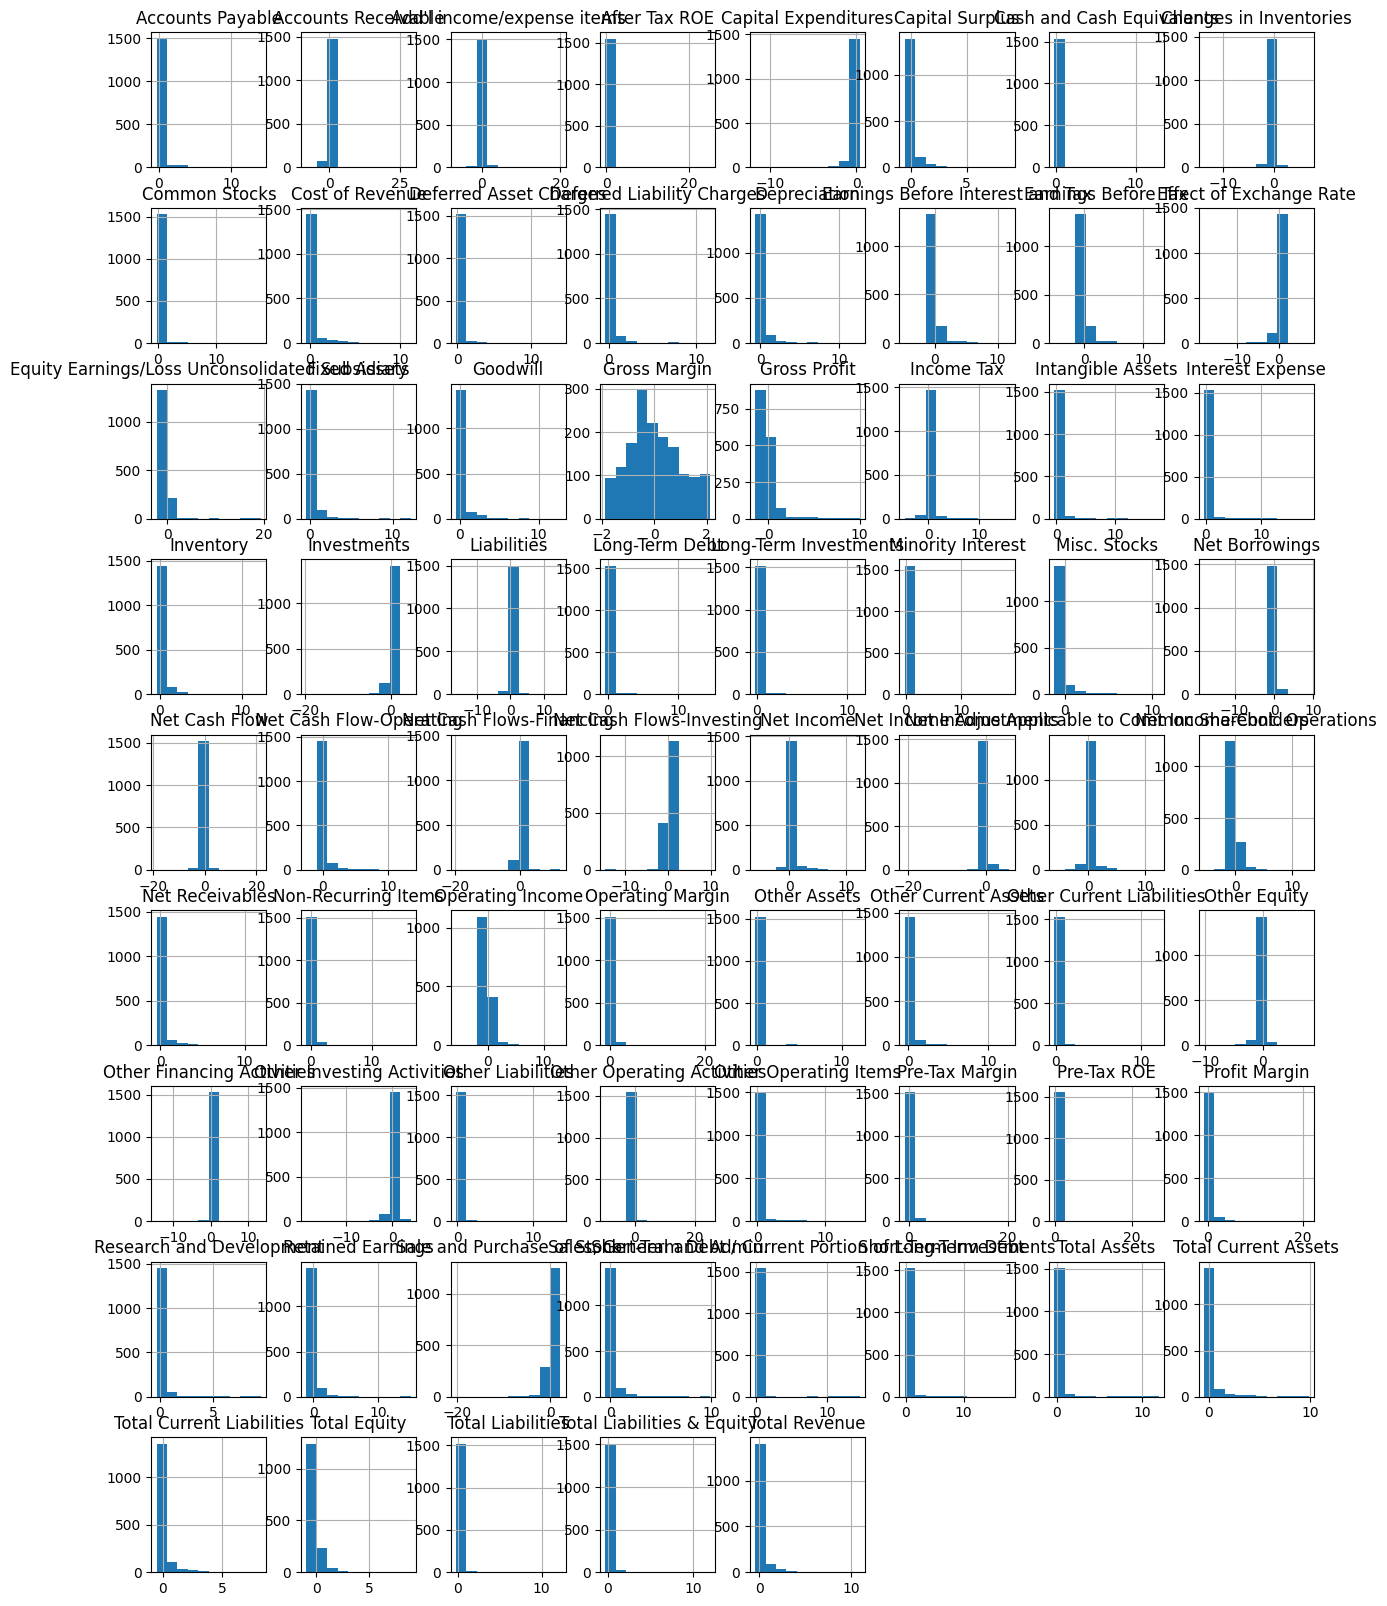

In [ ]:
plt.tight_layout()
s_DF_x.hist(figsize=(15,20))

**Discretization**

In [ ]:
# KbinsDiscretizer
dis_features = infeatures

discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform') 
discretizer.fit(dis_features)
_discretize = discretizer.transform(dis_features)
dis_x = pd.DataFrame(_discretize)
dis_x

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0     0.0  1.0  1.0  0.0  7.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  1.0   
1     0.0  1.0  0.0  0.0  7.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  1.0   
2     0.0  1.0  1.0  0.0  6.0  1.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  2.0   
3     0.0  1.0  1.0  0.0  6.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  2.0   
4     0.0  1.0  1.0  0.0  7.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  2.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1557  0.0  1.0  1.0  0.0  7.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  2.0   
1558  0.0  1.0  1.0  0.0  7.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  2.0   
1559  0.0  1.0  1.0  0.0  7.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  2.0   
1560  0.0  1.0  1.0  0.0  7.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  2.0   
1561  0.0  1.0  1.0  0.0  7.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  2.0   

       14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0     1.0  5.0  0.0  0.0  0.0  4.0  1.0  1.0  0.0  0.0  0.0  6.0  4.0  0.0   
1     1.0  5.0  0.0  0.0  0.0  4.0  1.0  1.0  0.0  0.0  0.0  6.0  4.0  0.0   
2     2.0  5.0  0.0  0.0  0.0  5.0  1.0  1.0  0.0  0.0  0.0  6.0  4.0  0.0   
3     2.0  5.0  0.0  0.0  0.0  5.0  2.0  1.0  0.0  0.0  0.0  6.0  4.0  0.0   
4     2.0  5.0  0.0  0.0  0.0  4.0  0.0  1.0  0.0  0.0  0.0  6.0  4.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1557  2.0  5.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  6.0  4.0  0.0   
1558  2.0  5.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  6.0  4.0  0.0   
1559  2.0  5.0  0.0  0.0  0.0  5.0  0.0  1.0  0.0  0.0  0.0  6.0  4.0  0.0   
1560  2.0  5.0  0.0  0.0  0.0  5.0  0.0  1.0  0.0  0.0  0.0  6.0  4.0  0.0   
1561  2.0  5.0  0.0  0.0  0.0  5.0  0.0  1.0  0.0  0.0  0.0  6.0  4.0  0.0   

       28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0     0.0  0.0  0.0  5.0  3.0  1.0  4.0  4.0  2.0  6.0  2.0  1.0  0.0  0.0   
1     0.0  0.0  0.0  5.0  3.0  1.0  5.0  4.0  2.0  6.0  2.0  1.0  0.0  0.0   
2     0.0  0.0  0.0  5.0  3.0  1.0  4.0  4.0  2.0  6.0  2.0  2.0  0.0  0.0   
3     0.0  0.0  0.0  5.0  3.0  1.0  4.0  4.0  3.0  5.0  3.0  2.0  0.0  0.0   
4     0.0  0.0  0.0  5.0  3.0  1.0  4.0  4.0  2.0  6.0  2.0  2.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1557  0.0  0.0  0.0  5.0  3.0  1.0  4.0  4.0  2.0  6.0  2.0  2.0  0.0  0.0   
1558  0.0  0.0  0.0  5.0  3.0  1.0  4.0  4.0  2.0  6.0  2.0  2.0  0.0  0.0   
1559  0.0  0.0  0.0  5.0  3.0  1.0  4.0  4.0  2.0  6.0  2.0  2.0  0.0  0.0   
1560  0.0  0.0  0.0  5.0  3.0  1.0  4.0  4.0  2.0  6.0  2.0  2.0  0.0  0.0   
1561  0.0  0.0  0.0  5.0  3.0  1.0  4.0  4.0  2.0  6.0  2.0  2.0  0.0  0.0   

       42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0     2.0  0.0  0.0  0.0  0.0  4.0  4.0  6.0  0.0  2.0  0.0  0.0  0.0  0.0   
1     2.0  0.0  0.0  0.0  0.0  4.0  4.0  6.0  0.0  2.0  0.0  0.0  0.0  0.0   
2     2.0  0.0  0.0  0.0  0.0  3.0  4.0  6.0  0.0  2.0  0.0  0.0  0.0  0.0   
3     2.0  0.0  0.0  0.0  0.0  3.0  4.0  6.0  0.0  2.0  0.0  0.0  0.0  0.0   
4     2.0  0.0  0.0  0.0  0.0  4.0  4.0  6.0  0.0  2.0  0.0  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1557  2.0  0.0  0.0  0.0  0.0  4.0  4.0  6.0  0.0  2.0  0.0  0.0  0.0  0.0   
1558  2.0  0.0  0.0  0.0  0.0  4.0  4.0  6.0  0.0  2.0  0.0  0.0  0.0  0.0   
1559  2.0  0.0  0.0  0.0  0.0  4.0  3.0  6.0  0.0  2.0  0.0  0.0  0.0  0.0   
1560  2.0  0.0  0.0  0.0  0.0  4.0  4.0  6.0  0.0  2.0  0.0  0.0  0.0  0.0   
1561  2.0  0.0  0.0  0.0  0.0  4.0  4.0  6.0  0.0  2.0  0.0  0.0  0.0  0.0   

       56   57   58   59   60   61   62   63   64   65   66   67   68  
0     0.0  0.0  7.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  7.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
2     0.0  0.0  7.0  1.0  0.0  0.0  0.0  0.

In [ ]:
# K-means Discretizer
kdis_features = infeatures

kdiscretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans') 
kdiscretizer.fit(kdis_features)
_kdiscretize = kdiscretizer.transform(kdis_features)
kdis_x = pd.DataFrame(_kdiscretize)
kdis_x

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0     0.0  3.0  0.0  0.0  6.0  1.0  0.0  5.0  0.0  0.0  0.0  0.0  1.0  1.0   
1     0.0  3.0  0.0  0.0  6.0  1.0  0.0  5.0  0.0  0.0  0.0  0.0  1.0  1.0   
2     0.0  3.0  1.0  1.0  5.0  2.0  0.0  5.0  0.0  0.0  0.0  0.0  1.0  2.0   
3     0.0  4.0  1.0  1.0  5.0  1.0  0.0  5.0  0.0  0.0  1.0  0.0  1.0  3.0   
4     0.0  3.0  1.0  0.0  7.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  2.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1557  0.0  3.0  1.0  0.0  7.0  0.0  0.0  5.0  1.0  0.0  0.0  0.0  0.0  2.0   
1558  0.0  3.0  1.0  0.0  7.0  0.0  0.0  5.0  1.0  0.0  0.0  0.0  0.0  2.0   
1559  0.0  3.0  1.0  0.0  7.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  2.0   
1560  0.0  3.0  1.0  0.0  7.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  2.0   
1561  0.0  3.0  1.0  0.0  7.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  2.0   

       14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0     1.0  5.0  1.0  1.0  0.0  4.0  1.0  1.0  0.0  0.0  0.0  6.0  4.0  1.0   
1     1.0  5.0  1.0  1.0  1.0  4.0  1.0  1.0  0.0  0.0  1.0  6.0  4.0  1.0   
2     2.0  5.0  1.0  1.0  1.0  5.0  2.0  1.0  0.0  0.0  1.0  6.0  3.0  1.0   
3     3.0  5.0  1.0  1.0  1.0  5.0  2.0  0.0  0.0  0.0  1.0  6.0  4.0  2.0   
4     2.0  5.0  1.0  0.0  0.0  4.0  0.0  1.0  0.0  0.0  2.0  6.0  4.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1557  2.0  5.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  6.0  4.0  0.0   
1558  2.0  5.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  6.0  4.0  0.0   
1559  2.0  5.0  1.0  0.0  0.0  5.0  0.0  1.0  0.0  0.0  1.0  6.0  4.0  0.0   
1560  2.0  5.0  1.0  0.0  0.0  5.0  0.0  1.0  0.0  0.0  1.0  6.0  4.0  0.0   
1561  2.0  5.0  1.0  0.0  0.0  5.0  0.0  1.0  0.0  0.0  1.0  6.0  4.0  0.0   

       28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0     0.0  0.0  0.0  4.0  3.0  0.0  4.0  5.0  1.0  6.0  1.0  1.0  0.0  1.0   
1     0.0  0.0  0.0  4.0  3.0  0.0  4.0  5.0  1.0  6.0  1.0  1.0  0.0  1.0   
2     0.0  0.0  0.0  4.0  3.0  1.0  4.0  5.0  3.0  5.0  2.0  2.0  0.0  2.0   
3     0.0  0.0  0.0  4.0  3.0  1.0  4.0  4.0  4.0  4.0  3.0  3.0  0.0  2.0   
4     0.0  0.0  0.0  4.0  3.0  0.0  4.0  5.0  2.0  5.0  2.0  2.0  0.0  1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1557  1.0  0.0  0.0  4.0  3.0  0.0  4.0  5.0  2.0  5.0  2.0  2.0  0.0  1.0   
1558  1.0  0.0  0.0  4.0  3.0  0.0  4.0  5.0  2.0  5.0  2.0  2.0  0.0  1.0   
1559  0.0  0.0  0.0  4.0  3.0  0.0  4.0  5.0  2.0  5.0  2.0  2.0  0.0  1.0   
1560  0.0  0.0  0.0  4.0  3.0  0.0  4.0  5.0  2.0  5.0  2.0  2.0  0.0  1.0   
1561  0.0  0.0  0.0  4.0  3.0  0.0  4.0  5.0  2.0  5.0  2.0  2.0  0.0  1.0   

       42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0     2.0  0.0  0.0  1.0  0.0  3.0  3.0  5.0  0.0  2.0  1.0  0.0  0.0  0.0   
1     2.0  0.0  0.0  1.0  0.0  3.0  3.0  5.0  0.0  2.0  1.0  0.0  1.0  0.0   
2     2.0  0.0  0.0  1.0  0.0  3.0  3.0  5.0  0.0  2.0  1.0  0.0  1.0  0.0   
3     3.0  1.0  0.0  1.0  0.0  3.0  3.0  5.0  0.0  2.0  1.0  0.0  1.0  1.0   
4     2.0  0.0  0.0  0.0  0.0  4.0  3.0  5.0  0.0  2.0  0.0  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1557  2.0  0.0  0.0  0.0  1.0  4.0  3.0  5.0  0.0  2.0  0.0  1.0  0.0  1.0   
1558  2.0  0.0  0.0  0.0  1.0  4.0  3.0  5.0  0.0  2.0  0.0  1.0  0.0  1.0   
1559  2.0  1.0  0.0  0.0  0.0  4.0  3.0  5.0  0.0  2.0  0.0  1.0  0.0  1.0   
1560  2.0  1.0  0.0  0.0  0.0  4.0  3.0  5.0  0.0  2.0  0.0  1.0  0.0  1.0   
1561  2.0  1.0  0.0  0.0  0.0  4.0  3.0  5.0  0.0  2.0  0.0  0.0  0.0  0.0   

       56   57   58   59   60   61   62   63   64   65   66   67   68  
0     0.0  0.0  7.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  
1     0.0  0.0  7.0  1.0  0.0  1.0  0.0  2.0  2.0  0.0  1.0  0.0  1.0  
2     0.0  0.0  6.0  2.0  0.0  1.0  0.0  1.

Discretization might not be an appropriate technique in this context

# **Feature Engineering**

**PCA**

In [ ]:
X  = StandardScaler().fit_transform(infeatures)
pca = PCA()
X_pca = pca.fit_transform(X) 
#X_reduced = PCA(n_components=3).fit_transform(X) 

principalDf = pd.DataFrame(data = X_pca)
principalDf

0         1         2         3         4         5         6   \
0    -1.575675  0.391682  0.507912 -0.840330  0.017547  0.770041  1.640454   
1    -0.861656  0.246724  0.308161 -0.609357  0.638479  1.090189  2.148779   
2     1.295661 -0.964414  0.613305 -0.218137 -0.161858 -0.066293  0.883085   
3     2.119601 -1.177574  0.325531  0.177502  0.393323 -0.178633  0.055679   
4    -1.825050  0.158325 -0.351421 -0.642121 -0.384996 -0.275256  0.083138   
...        ...       ...       ...       ...       ...       ...       ...   
1557 -1.698990  1.040301 -0.511884 -0.561145 -0.536881 -0.450019 -0.289492   
1558 -1.645335  1.056069 -0.797834 -0.631516 -0.571420 -0.394808 -0.232755   
1559 -1.806456  0.122932 -0.102886 -0.093181  0.092122 -0.288860 -0.010802   
1560 -1.756231  0.278648  0.051057  0.005703  0.055144 -0.448568 -0.107624   
1561 -1.708017  0.220060 -0.112658 -0.327783  0.050124 -0.227463  0.277184   

            7         8         9         10        11        12        13  \
0    -0.189153  0.085936 -0.093648 -0.271652 -0.251593 -0.718285  0.565962   
1    -0.561406  0.404262 -0.079881 -1.076191 -0.095700 -1.094928  1.131982   
2    -0.195443  0.630194  0.117981  0.169663 -0.379799 -1.207755  0.590041   
3    -0.284168  0.517495 -0.227880 -0.255477 -0.260312 -1.419500 -0.070460   
4     0.064969  0.032358 -0.250579  0.163044 -0.201125  0.105362  0.259238   
...        ...       ...       ...       ...       ...       ...       ...   
1557  0.082501 -0.221403  0.520948 -0.312248  0.244969  0.198239 -0.040767   
1558 -0.034280 -0.175163  0.558644 -0.300689  0.256350  0.117505  0.039941   
1559 -0.058809  0.086838 -0.218355  0.296718 -0.124090  0.085389  0.173645   
1560 -0.043004  0.004062 -0.199686  0.204126 -0.049403  0.032261  0.127848   
1561 -0.069625 -0.010048 -0.167222  0.338312 -0.094979 -0.153912  0.121547   

            14        15        16        17        18        19        20  \
0     0.021043  0.787148 -0.446575 -1.876646 -1.260815 -0.564557  0.694256   
1     0.120154  1.038056 -0.423508 -2.195217 -1.556512 -0.764975  0.590937   
2     0.549688  0.189409  0.137491 -1.003758 -0.378778  0.532470  1.138282   
3     0.428625 -0.592193  0.486043 -1.499749 -0.926085 -0.082053  1.341699   
4    -0.105684  0.063910  0.033430 -0.368837  0.423682 -0.027401 -0.099422   
...        ...       ...       ...       ...       ...       ...       ...   
1557 -0.792936  0.554270 -0.446738  0.961613  0.116760 -0.607581 -0.065783   
1558 -0.726136  0.633272 -0.495818  0.912261  0.069511 -0.647423 -0.123757   
1559  0.022368 -0.230909  0.241716 -0.492137  0.218457 -0.021199 -0.170910   
1560  0.066965 -0.212485  0.218159 -0.519664  0.163482  0.107162  0.078597   
1561  0.184281 -0.178154  0.123927 -0.635422  0.365751 -0.117872 -0.154910   

            21        22        23        24        25        26        27  \
0    -0.385832 -0.923355 -0.037984  0.092374  0.249480 -0.164847 -0.484407   
1    -0.318140 -1.556130 -0.043155 -0.225902  0.640243 -0.231782 -0.819311   
2     0.052081 -0.469186  0.237945  0.442224 -0.107696 -0.299896 -1.100309   
3    -0.168793 -1.255067  0.936983  0.610761 -0.588846 -0.693652 -0.750378   
4     0.135457 -0.122466 -0.044687  0.203977 -0.095538  0.057367  0.074377   
...        ...       ...       ...       ...       ...       ...       ...   
1557 -0.307696  0.516022  0.166387 -0.363343 -0.034933 -0.319957 -0.374917   
1558 -0.356963  0.508828  0.169039 -0.157939  0.019516 -0.341999 -0.265125   
1559  0.207923 -0.096078 -0.070914  0.268757 -0.146495  0.123143  0.148300   
1560  0.118497 -0.092112 -0.126340  0.133161 -0.062334  0.058404  0.092112   
1561  0.186791 -0.170307 -0.236689  0.336386 -0.043211  0.002125  0.178961   

            28        29        30        31        32        33        34  \
0     0.739588  0.443030 -0.364665  0.029230  0.814057 -0.441188 -0.469951   
1     0.961540  0.023438 -0.105694 -0.451235  0.955452 -0.128993 -0.457170   
2    -0.257224  0.692334 -0.62

In [ ]:
pca.explained_variance_ratio_

array([3.01187534e-01, 1.32459785e-01, 5.96618022e-02, 5.05335269e-02,
       4.46202969e-02, 4.26020923e-02, 3.49648042e-02, 3.29219342e-02,
       2.82410423e-02, 2.36756763e-02, 2.11850183e-02, 1.80210676e-02,
       1.78710991e-02, 1.69086466e-02, 1.51375744e-02, 1.42448856e-02,
       1.30949485e-02, 1.25177561e-02, 1.21937423e-02, 1.06955086e-02,
       9.55084350e-03, 9.22940213e-03, 7.78384443e-03, 6.87584599e-03,
       5.85143631e-03, 5.60174272e-03, 4.98341325e-03, 4.87688530e-03,
       4.19005083e-03, 3.93917975e-03, 3.47100011e-03, 3.29327107e-03,
       3.14875688e-03, 2.73451472e-03, 2.37354428e-03, 2.17158682e-03,
       2.02442638e-03, 1.79141273e-03, 1.75290183e-03, 1.57192527e-03,
       1.44082134e-03, 1.26700827e-03, 1.10273827e-03, 9.58404106e-04,
       8.44731708e-04, 7.49381491e-04, 6.50508438e-04, 5.54472753e-04,
       4.71094355e-04, 4.56460861e-04, 3.40099105e-04, 2.82549255e-04,
       2.21404560e-04, 1.93622982e-04, 1.47470062e-04, 1.19072413e-04,
      

**SVD**

In [ ]:
# calculate the  SVD for the data X
U_infeatures,S_infeatures,Vt_infeatures = np.linalg.svd(X, full_matrices=False)

#numpy.linalg.svd actually returns a Σ that is not a diagonal matrix, but a list of the entries on the diagonal.
num_sv_infeatures = np.arange(1, S_infeatures.size+1)
cum_var_explained_infeatures = [np.sum(np.square(S_infeatures[0:n])) / np.sum(np.square(S_infeatures)) for n in num_sv_infeatures]
print(S_infeatures)
print(S_infeatures.size)

[1.80170447e+02 1.19483266e+02 8.01887132e+01 7.37997457e+01
 6.93475765e+01 6.77611121e+01 6.13875937e+01 5.95672747e+01
 5.51703096e+01 5.05145230e+01 4.77836678e+01 4.40712449e+01
 4.38874847e+01 4.26893443e+01 4.03917998e+01 3.91827166e+01
 3.75679033e+01 3.67306236e+01 3.62521332e+01 3.39520328e+01
 3.20838092e+01 3.15392851e+01 2.89642398e+01 2.72225078e+01
 2.51128673e+01 2.45712154e+01 2.31754679e+01 2.29264246e+01
 2.12507717e+01 2.06047789e+01 1.93415990e+01 1.88399090e+01
 1.84219087e+01 1.71674263e+01 1.59942444e+01 1.52986694e+01
 1.47712094e+01 1.38951388e+01 1.37449719e+01 1.30161039e+01
 1.24614944e+01 1.16857014e+01 1.09018771e+01 1.01634088e+01
 9.54167145e+00 8.98703724e+00 8.37320121e+00 7.73045693e+00
 7.12556015e+00 7.01401730e+00 6.05435391e+00 5.51838687e+00
 4.88492995e+00 4.56818320e+00 3.98673153e+00 3.58237163e+00
 2.65499618e+00 2.48438851e+00 2.24550942e+00 1.91527147e+00
 1.45494354e+00 1.09044497e+00 6.94934396e-01 5.31595698e-01
 5.09423297e-01 4.020958

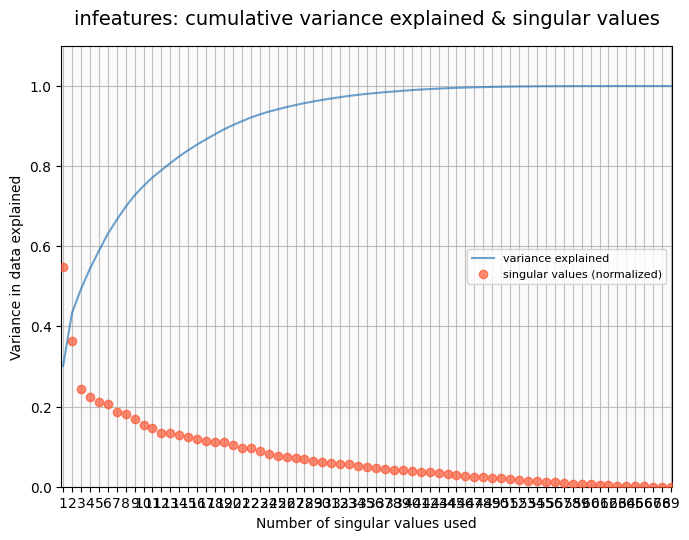

In [ ]:
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.plot(num_sv_infeatures,
         cum_var_explained_infeatures,
         color='#2171b5',
         label='variance explained',
         alpha=0.65,
         zorder=1000)

plt.scatter(num_sv_infeatures,
            sklearn.preprocessing.normalize(S_infeatures.reshape((1,-1))),
            color='#fc4e2a',
            label='singular values (normalized)',
            alpha=0.65,
            zorder=1000)

plt.legend(loc='center right', scatterpoints=1, fontsize=8)

ax.set_xticks(num_sv_infeatures)
ax.set_xlim(0.8, 69.1)
ax.set_ylim(0.0, 1.1)
ax.set_xlabel('Number of singular values used')
ax.set_ylabel('Variance in data explained')
ax.set_title('infeatures: cumulative variance explained & singular values',
             fontsize=14,
             y=1.03)

ax.set_facecolor('0.98')

plt.grid(alpha=0.8, zorder=1)
plt.tight_layout()

**Significant and Independent Features**

                                                    Accounts Payable  \
Accounts Payable                                            1.000000   
Accounts Receivable                                         0.101016   
Add'l income/expense items                                  0.154921   
After Tax ROE                                              -0.022578   
Capital Expenditures                                       -0.270516   
Capital Surplus                                             0.482610   
Cash and Cash Equivalents                                   0.800207   
Changes in Inventories                                     -0.151843   
Common Stocks                                               0.426181   
Cost of Revenue                                             0.373981   
Deferred Asset Charges                                      0.076551   
Deferred Liability Charges                                  0.177685   
Depreciation                                                0.41

<Axes: >

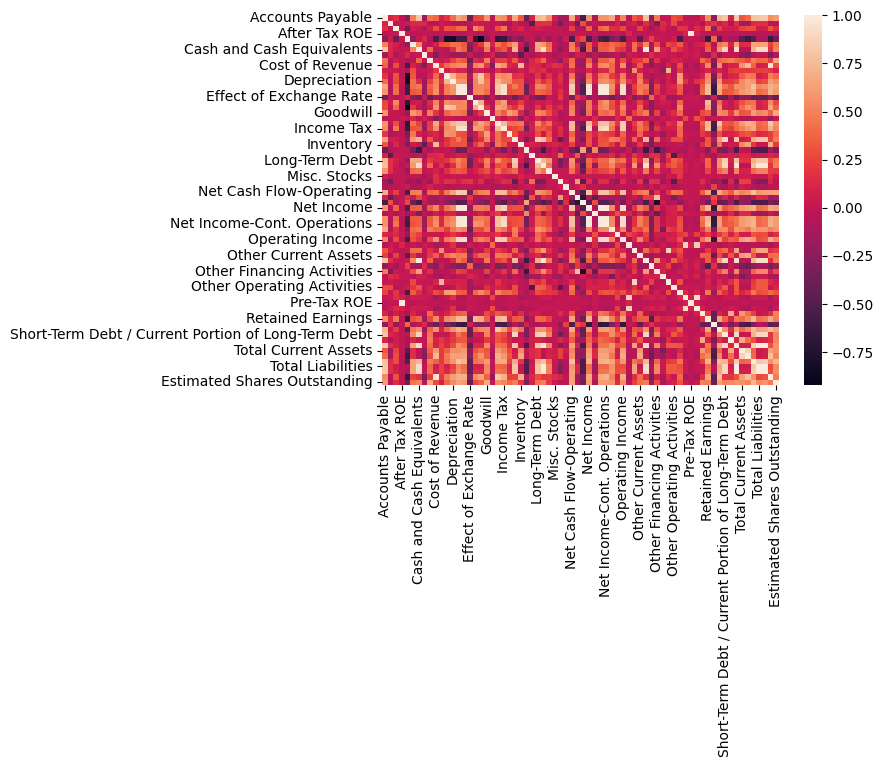

In [ ]:
#test the signifncance of the features
d_data = infeatures.copy()
d_data['Estimated Shares Outstanding'] = target
d_data.head(10)
print(d_data.corr())
sns.heatmap(d_data.corr())

# **Modelling**

In [ ]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1249, 69) (1249, 1)
(313, 69) (313, 1)


In [ ]:
# fit LinearRegression model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_hat = lm.predict(X_test)

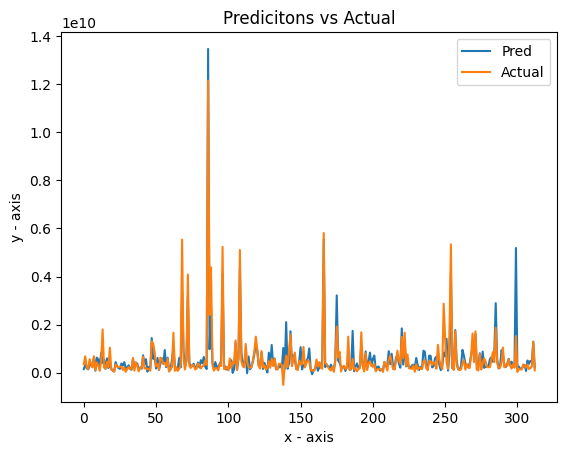

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_hat, label = "Pred")
plt.plot(y_test, label = "Actual")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Predicitons vs Actual')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
# Perform 10-fold cross validation
scores = cross_val_score(model, x, y, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.49100539 0.75082039 0.47312309 0.07204168 0.05197766 0.53566722
 0.36448849 0.80599907 0.83766096 0.57593196]


In [ ]:
predictions = cross_val_predict(model, x, y, cv=10)
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.5649084468601769


**Ridge Regression - #testing  𝛿 with cross validation**

In [ ]:
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 
# List to maintain the different values of delta 
delta = [] 
# Loop to compute the different values of cross-validation scores 
for i in range(30, 50): 
    ridgeModel = Ridge(alpha = i * 0.9) 
    ridgeModel.fit(X_train, y_train) 
    scores = cross_val_score(ridgeModel, X_test, y_test, cv = 10) #k-fold=10
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    delta.append(i * 0.9) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(delta)): 
    print(str(delta[i])+' : '+str(cross_val_scores_ridge[i])) 

27.0 : -1551.3433639136424
27.900000000000002 : -1551.6611693130735
28.8 : -1551.979227657365
29.7 : -1552.296895300905
30.6 : -1552.6141978372618
31.5 : -1552.9313734251873
32.4 : -1553.2482496999125
33.300000000000004 : -1553.5648825224412
34.2 : -1553.8812768946332
35.1 : -1554.1974329599284
36.0 : -1554.5132733198366
36.9 : -1554.8290119196236
37.800000000000004 : -1555.1444415926364
38.7 : -1555.4596331203104
39.6 : -1555.7745832296441
40.5 : -1556.0892958091874
41.4 : -1556.4037667639761
42.300000000000004 : -1556.7179980111616
43.2 : -1557.0319934059476
44.1 : -1557.3459279937842


In [ ]:
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 34) 
ridgeModelChosen.fit(X_train, y_train) 
  
# Evaluating the Ridge Regression model 
print(ridgeModelChosen.score(X_test, y_test)) 

0.822936140089523


**Lasso Regression - #testing δ with cross validation**

In [ ]:
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 
  
# List to maintain the different values of delta 
delta = [] 
  
# Loop to compute the cross-validation scores 
for i in range(1, 10): 
    lassoModel = Lasso(alpha = i *0.25) 
    lassoModel.fit(X_train, y_train) 
    scores = cross_val_score(lassoModel, X_test, y_test, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    delta.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(delta)): 
    print(str(delta[i])+' : '+str(cross_val_scores_lasso[i])) 

0.25 : -19.33145339091509
0.5 : -19.331453401273492
0.75 : -19.331453411632054
1.0 : -19.331453421990318
1.25 : -19.331453432348734
1.5 : -19.33145344270701
1.75 : -19.331453453065375
2.0 : -19.331453463424374
2.25 : -19.3314534737829


In [ ]:
# Building and fitting the Lasso Regression Model 
lassoModelChosen = Lasso(alpha = 0.5) 
lassoModelChosen.fit(X_train, y_train) 
  
# Evaluating the Lasso Regression model 
print(lassoModelChosen.score(X_test, y_test)) 

0.8102209153877521


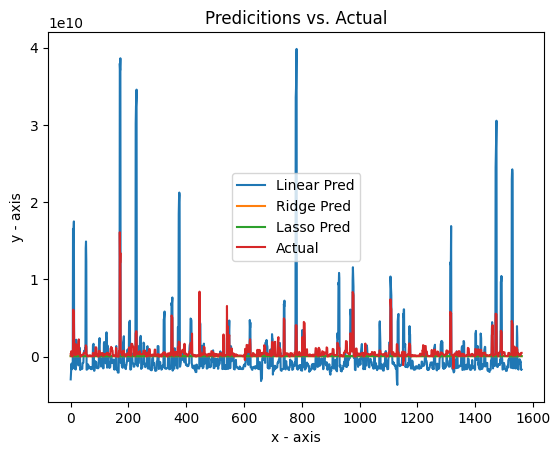

In [ ]:
linear_predictions = lm.predict(X)
ridge_predictions = ridgeModel.predict(X)
lasso_predictions = lassoModel.predict(X)

import matplotlib.pyplot as plt
plt.plot(linear_predictions, label = "Linear Pred")
plt.plot(ridge_predictions, label = "Ridge Pred")
plt.plot(lasso_predictions, label = "Lasso Pred")
plt.plot(y, label = "Actual")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Predicitions vs. Actual')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()